In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import numpy as np
import os

In [2]:
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.distributions.mixture_rvs import mixture_rvs

## Heatmap for Individual users, all delays.

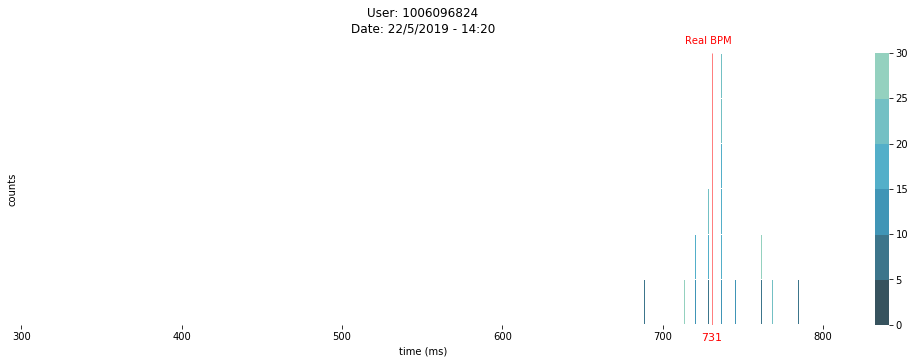

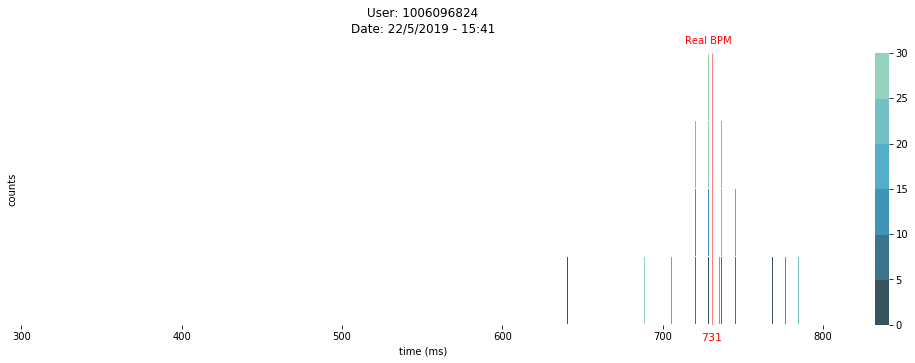

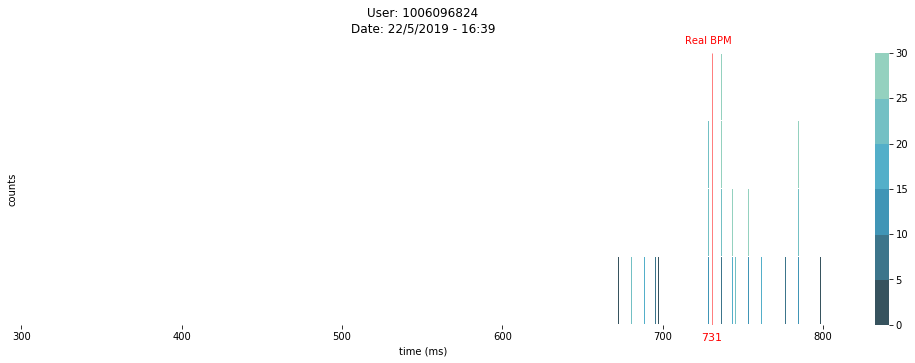

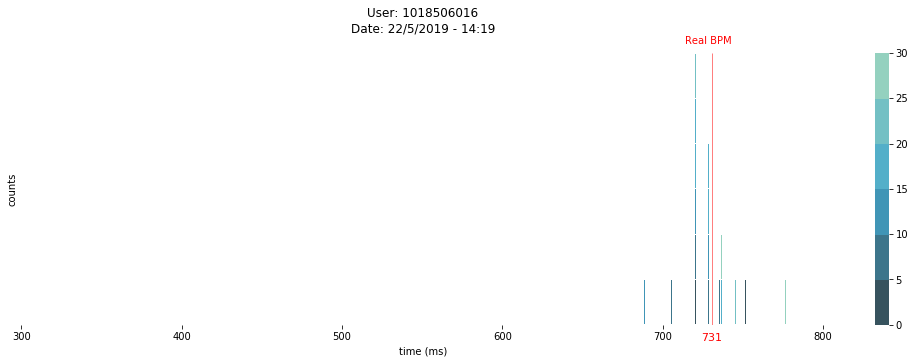

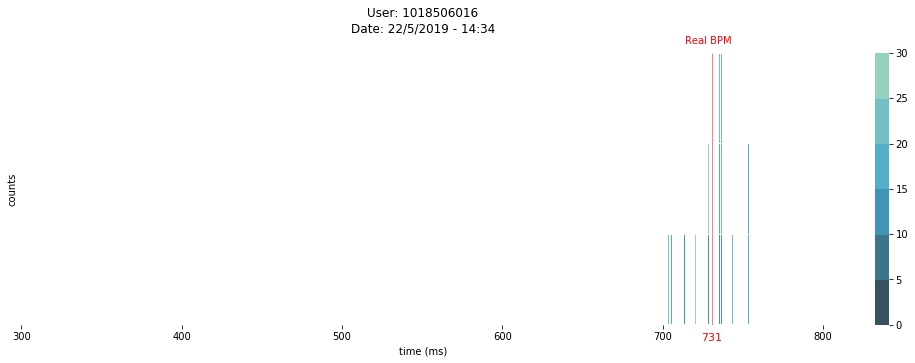

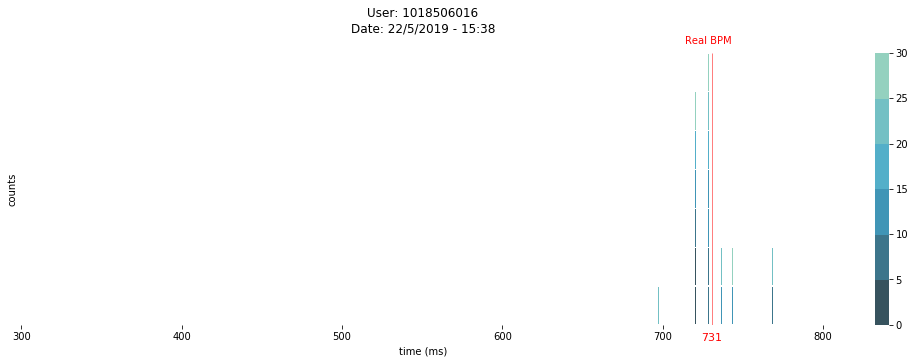

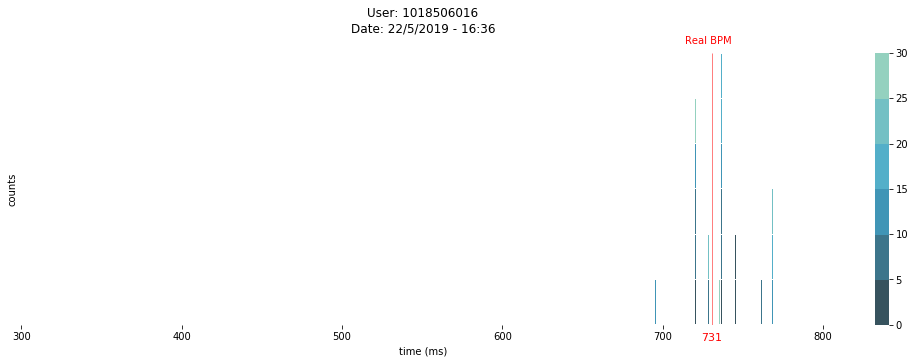

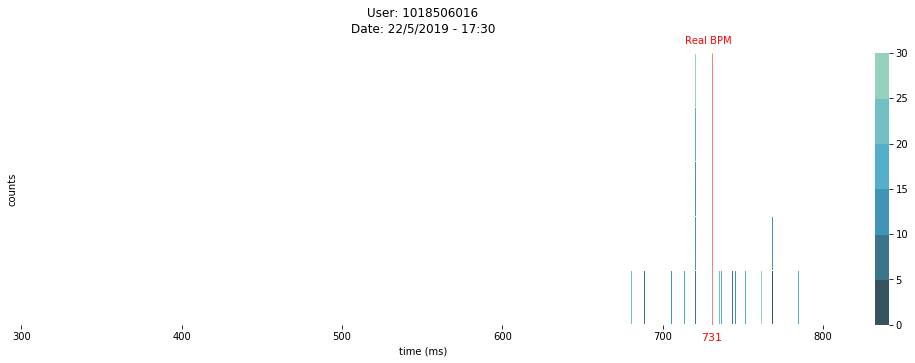

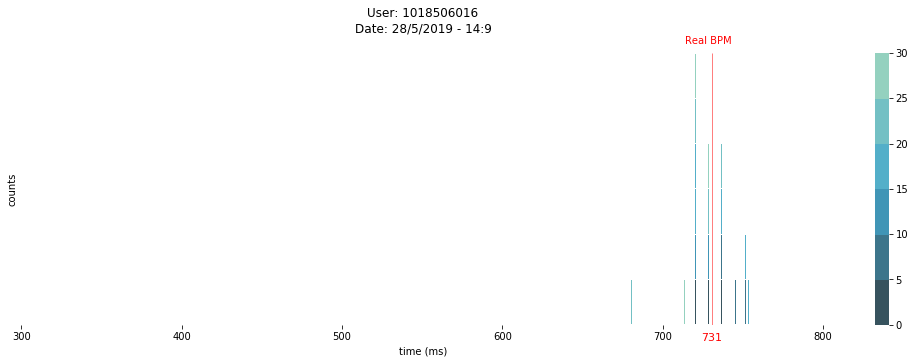

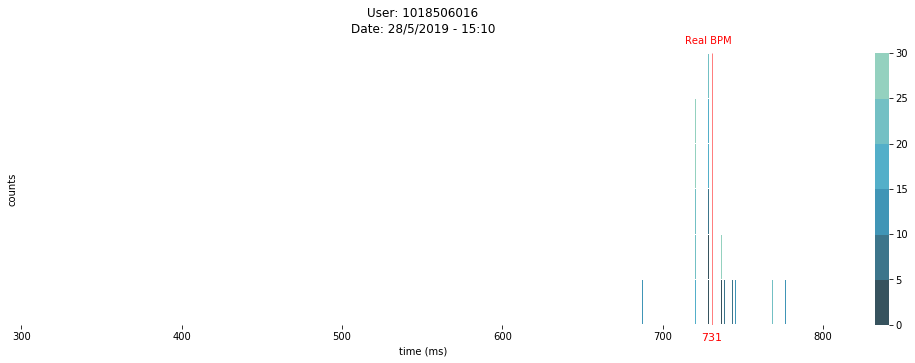

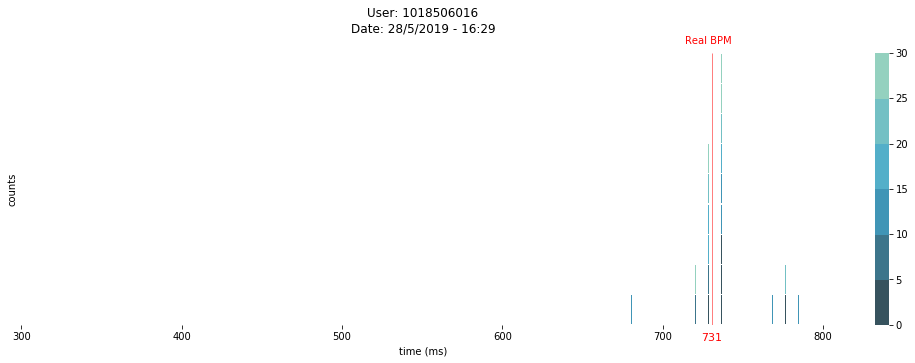

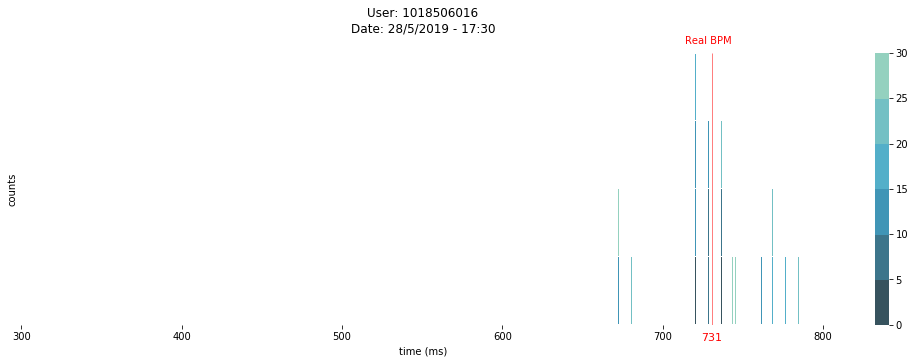

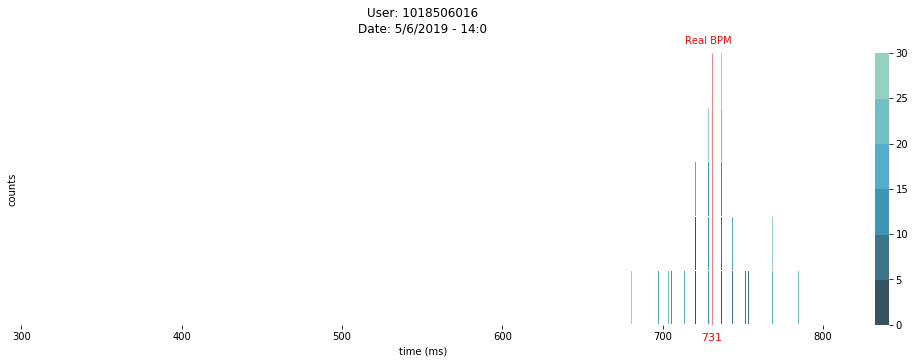

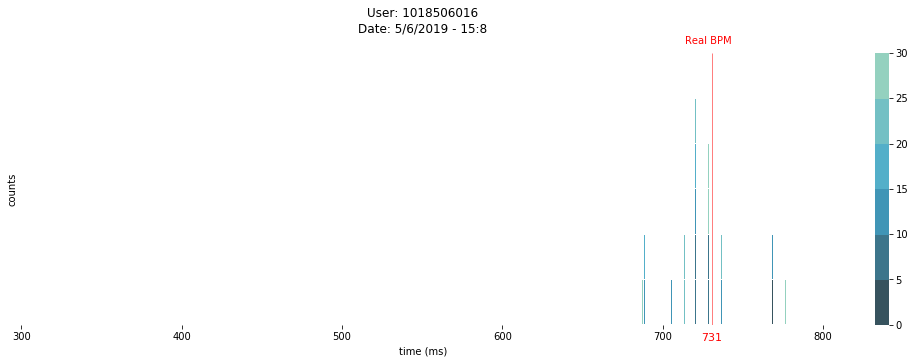

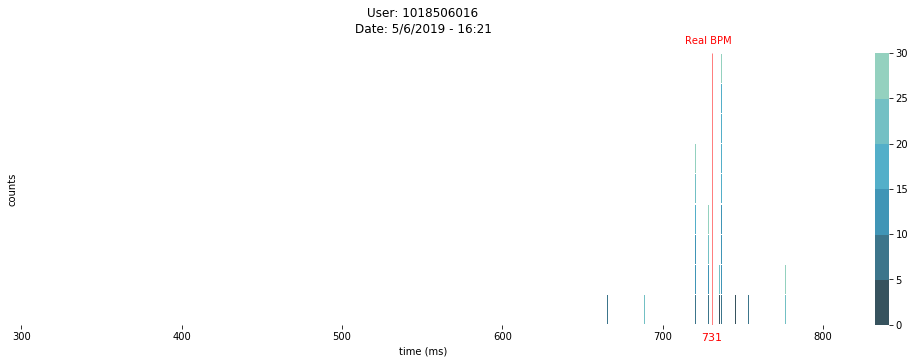

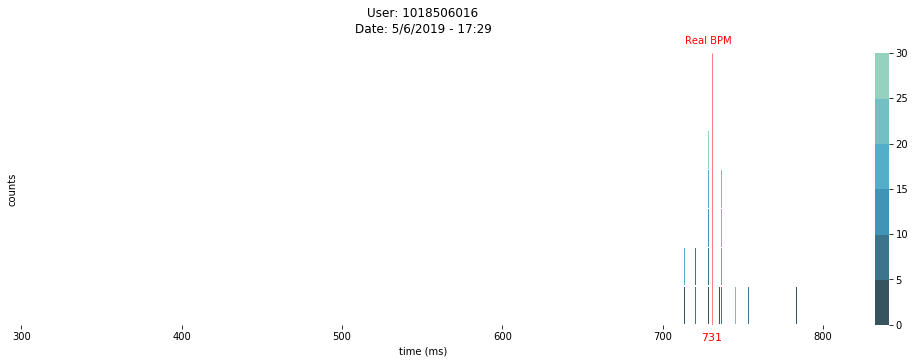

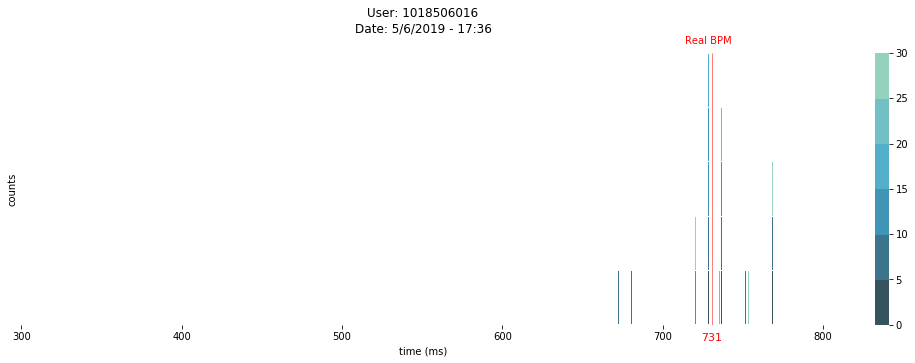

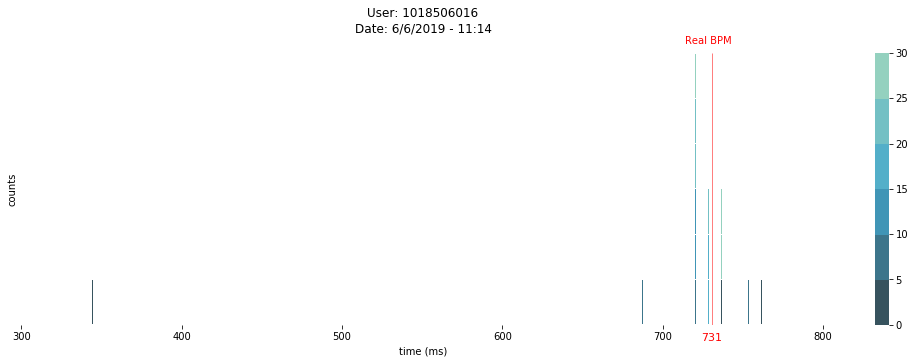

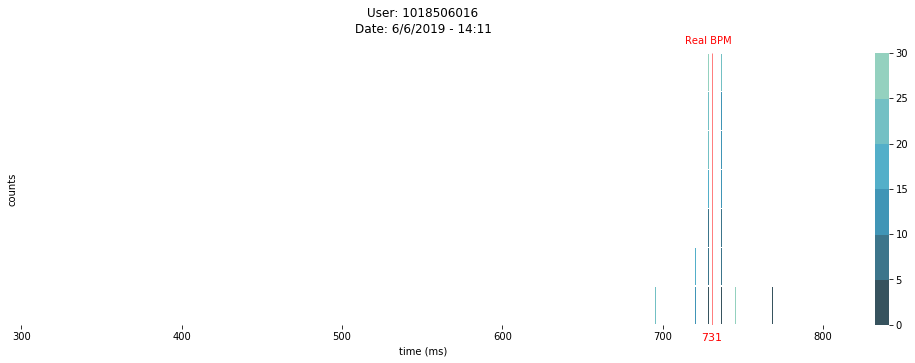

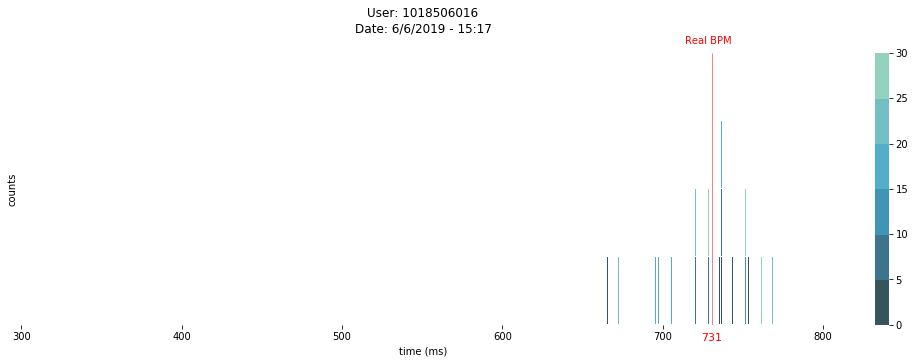

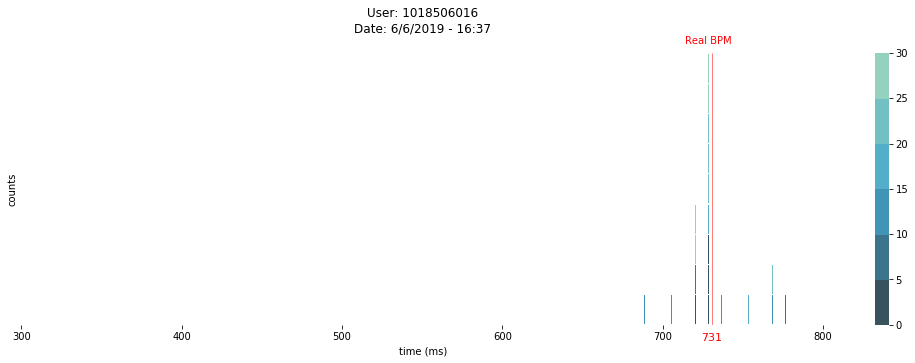

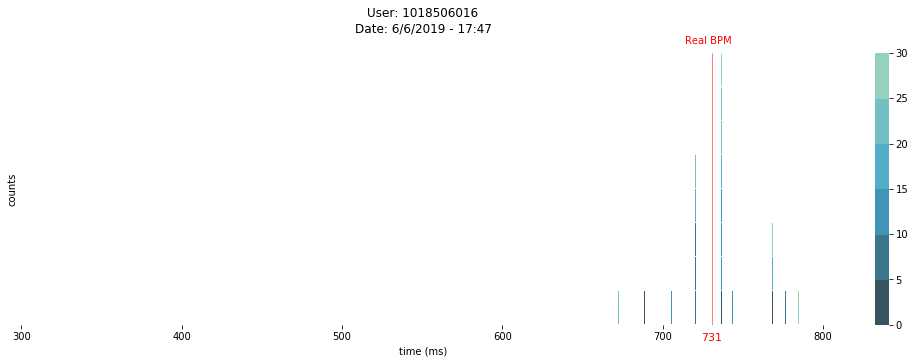

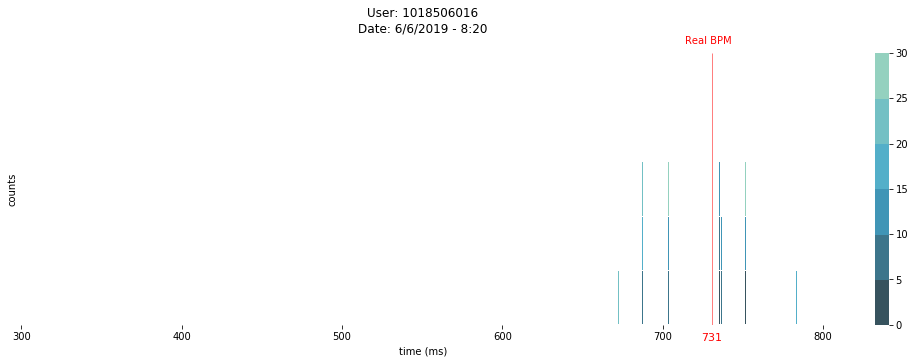

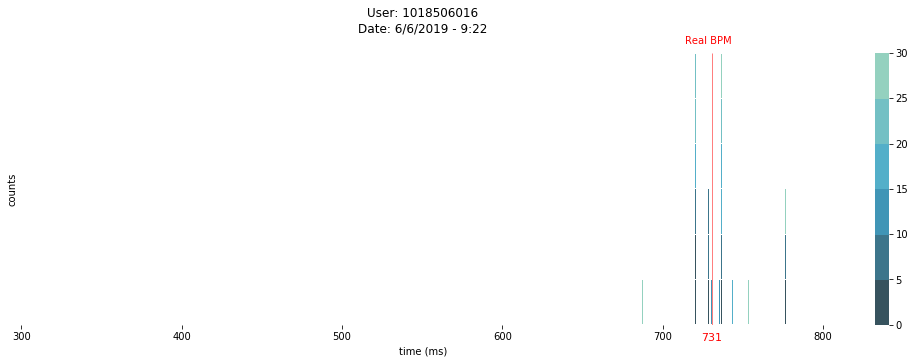

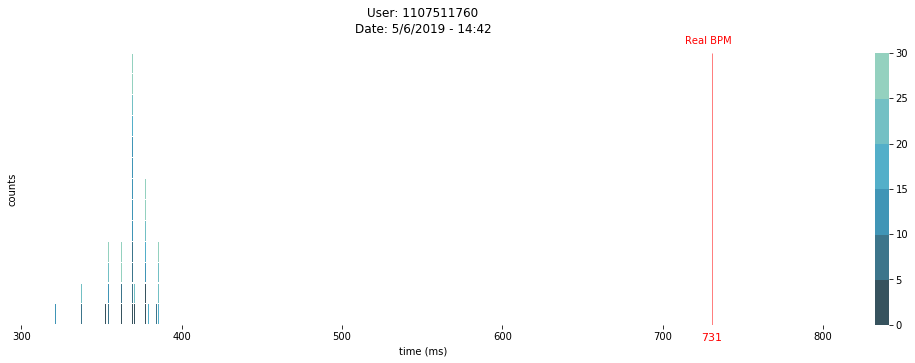

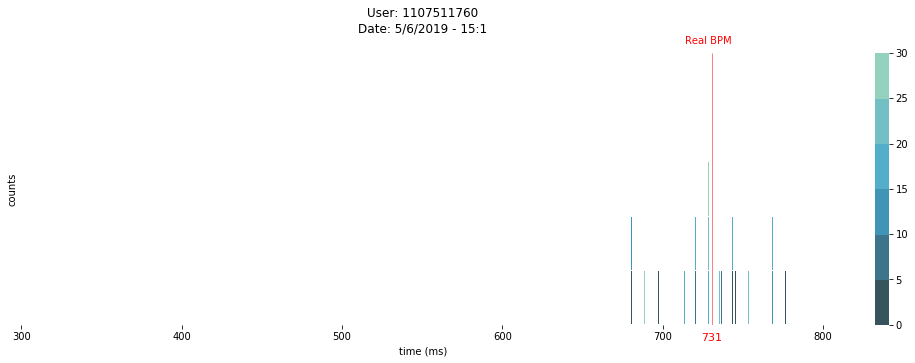

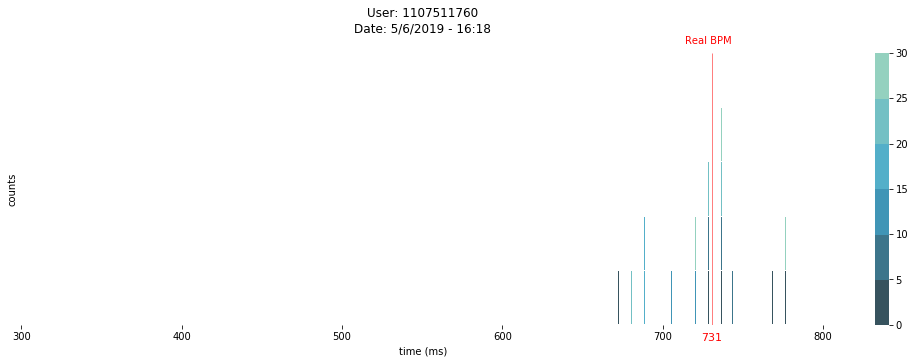

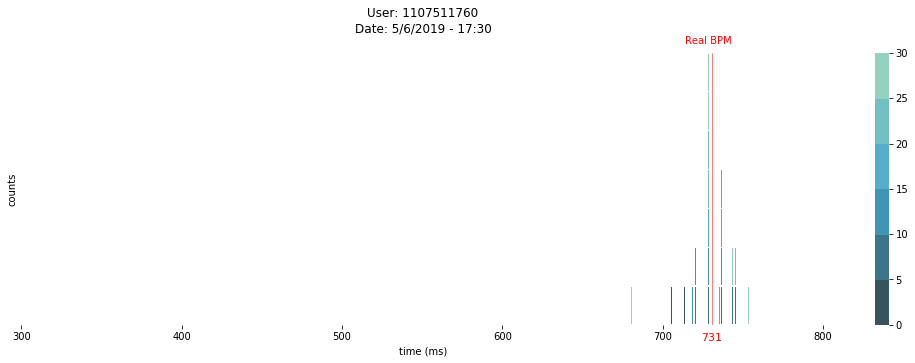

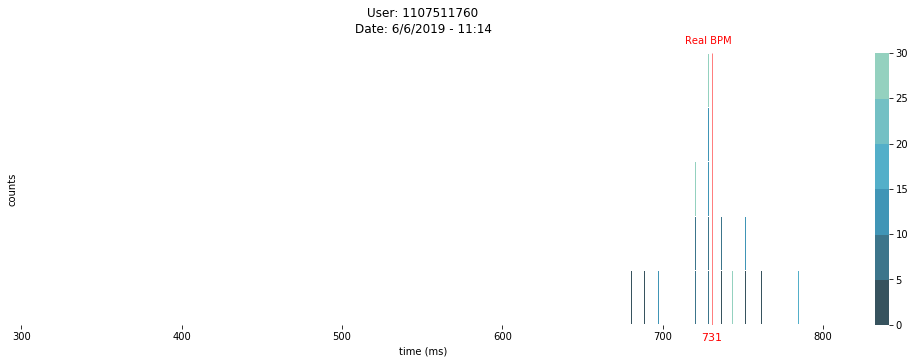

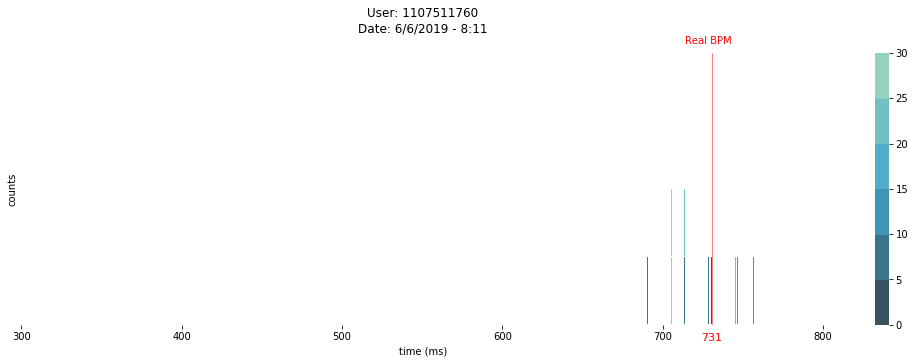

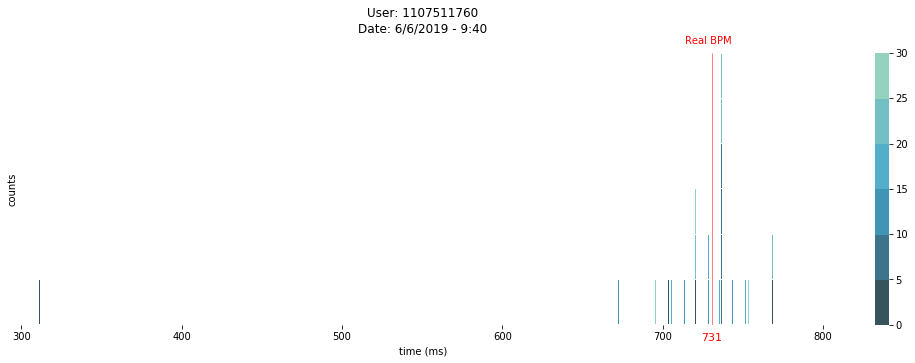

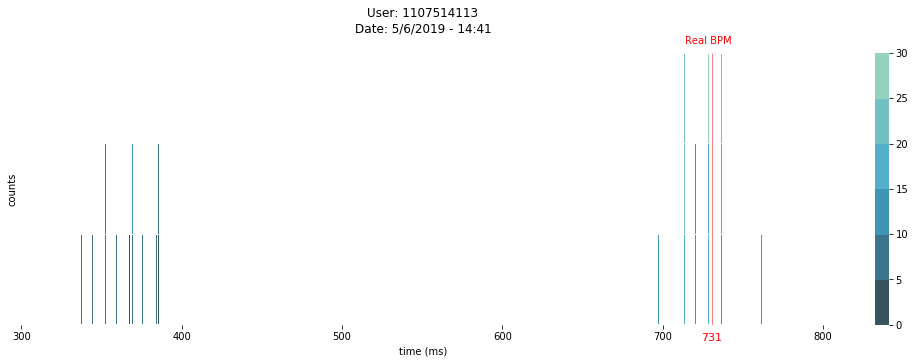

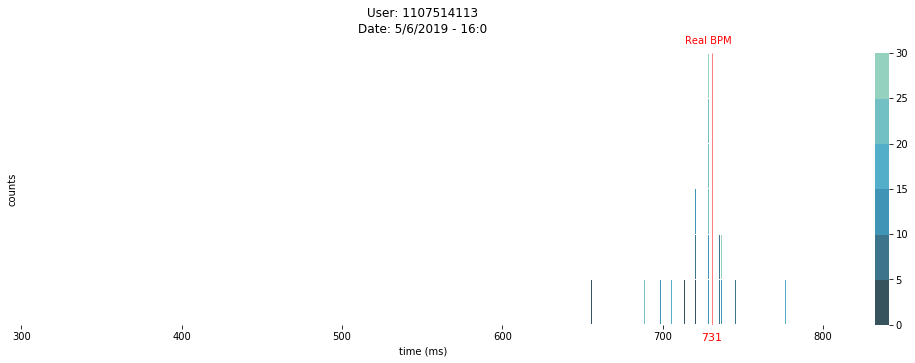

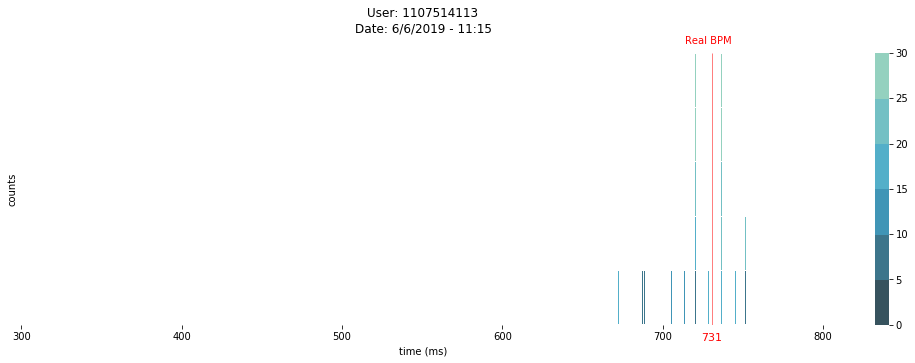

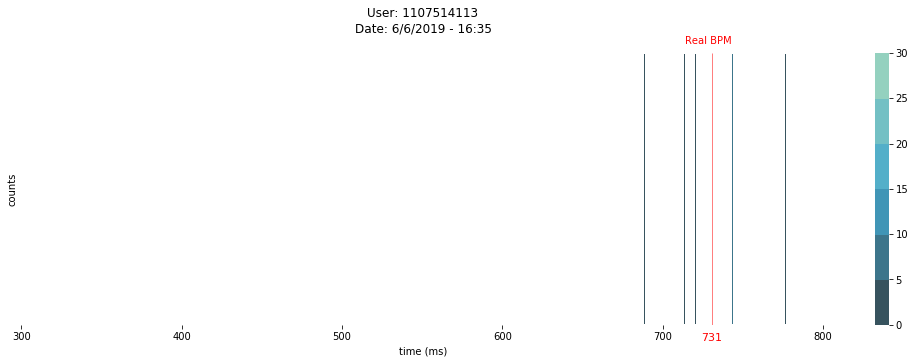

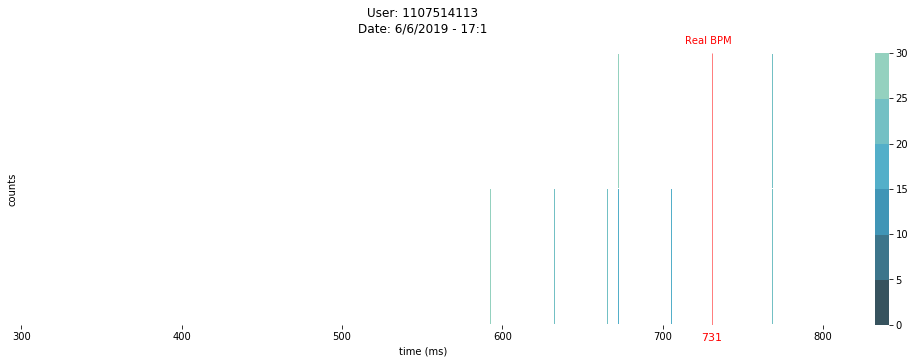

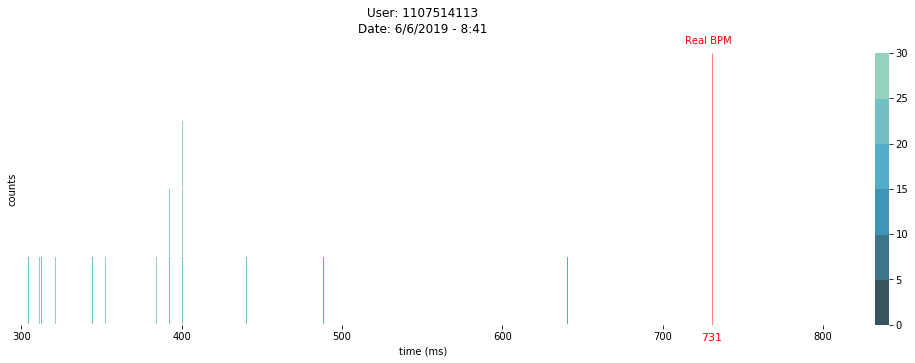

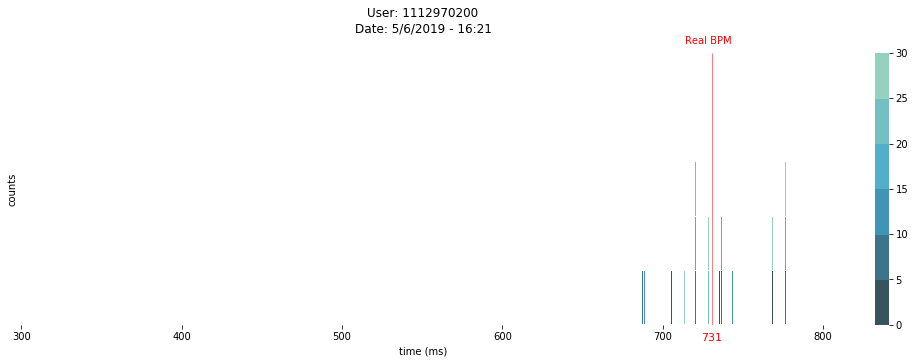

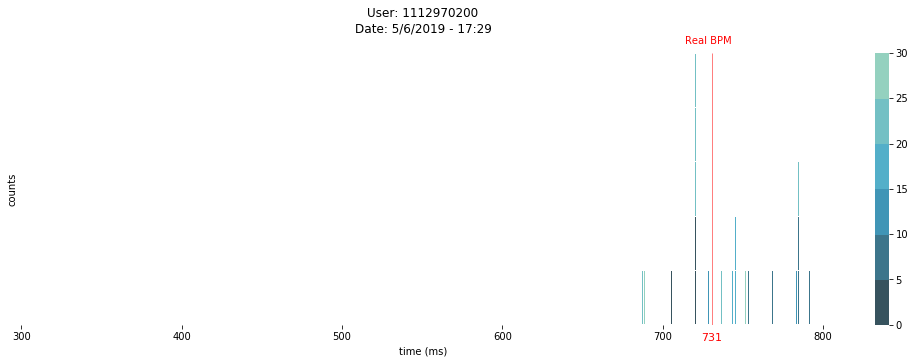

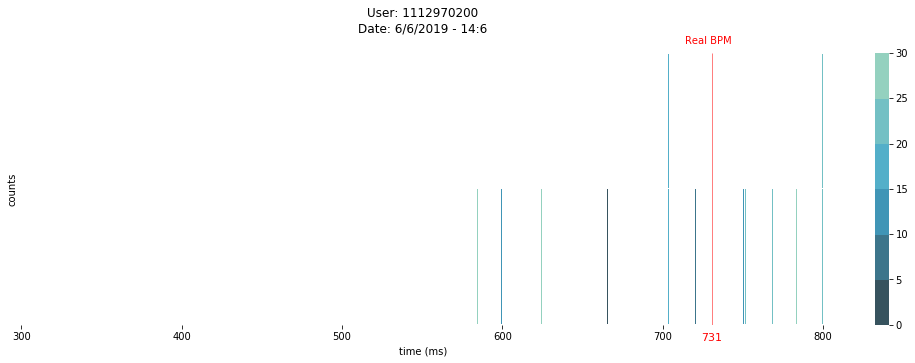

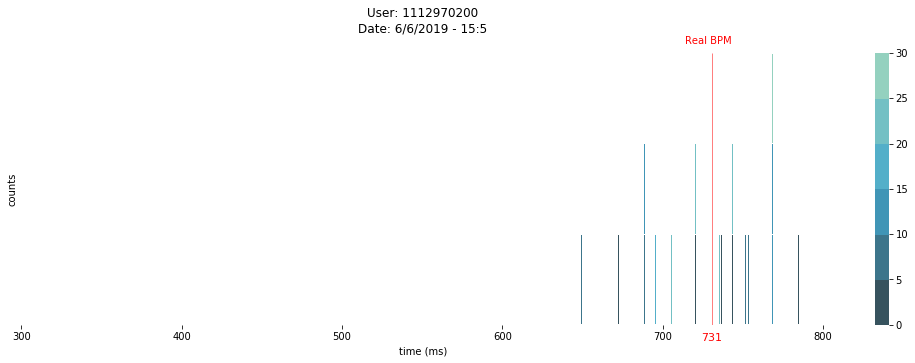

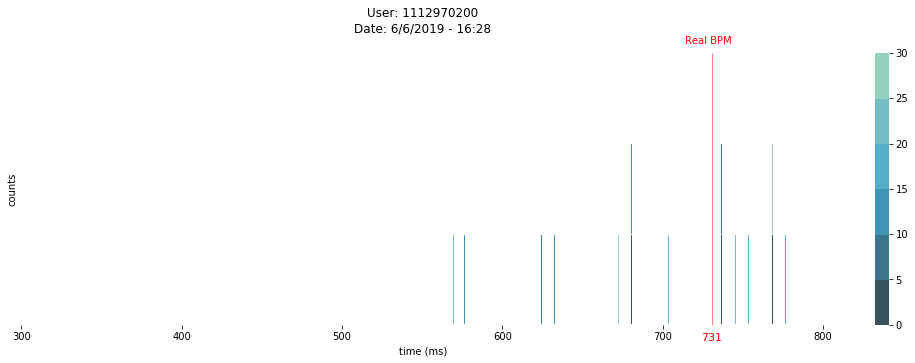

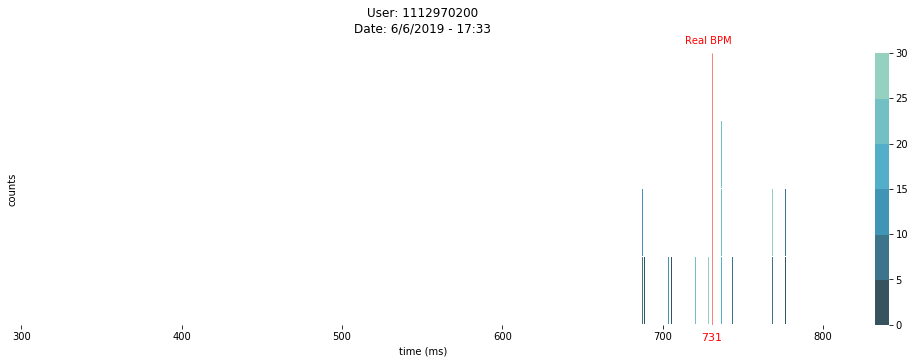

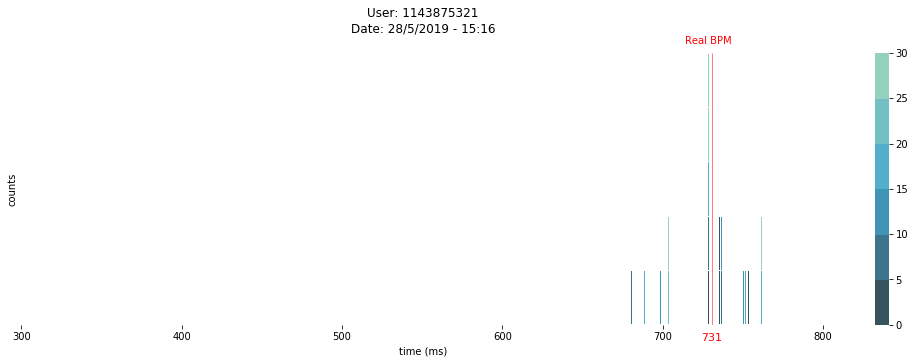

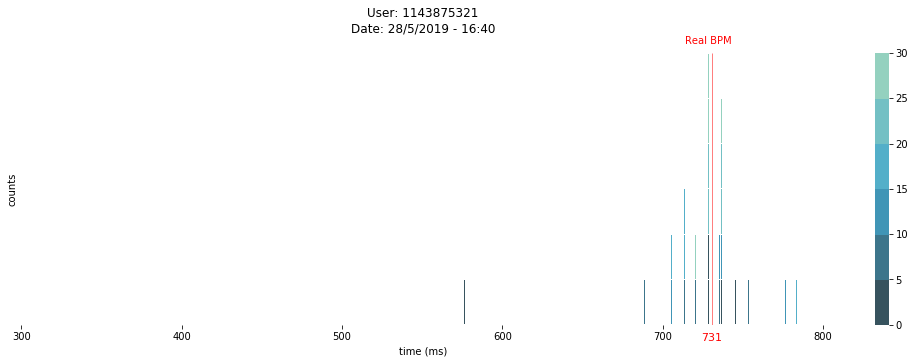

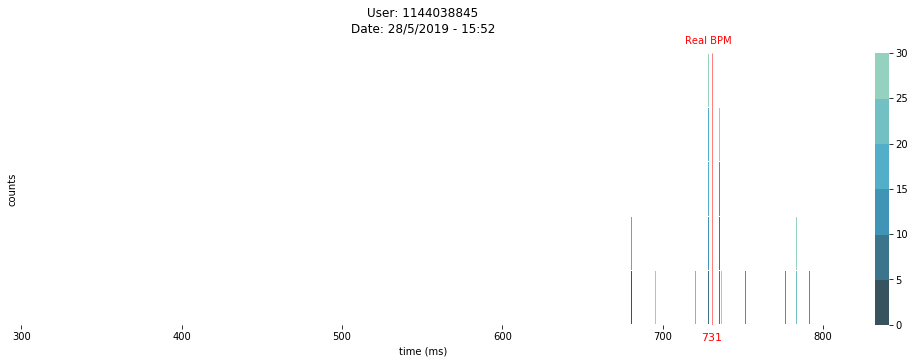

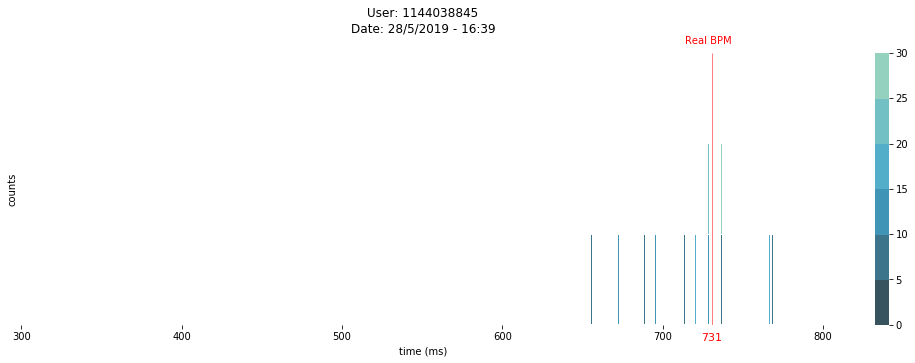

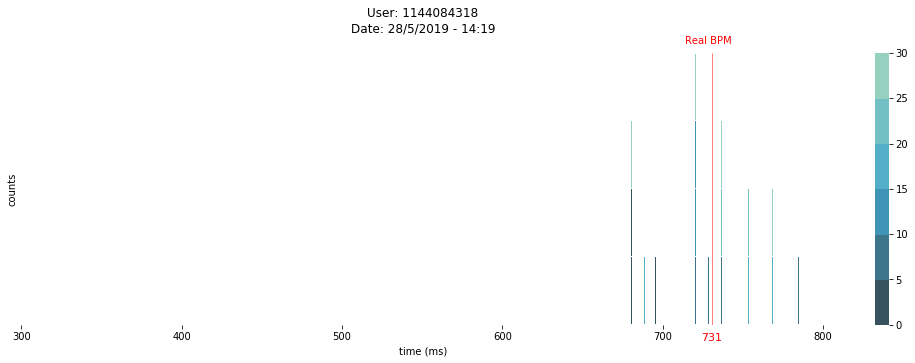

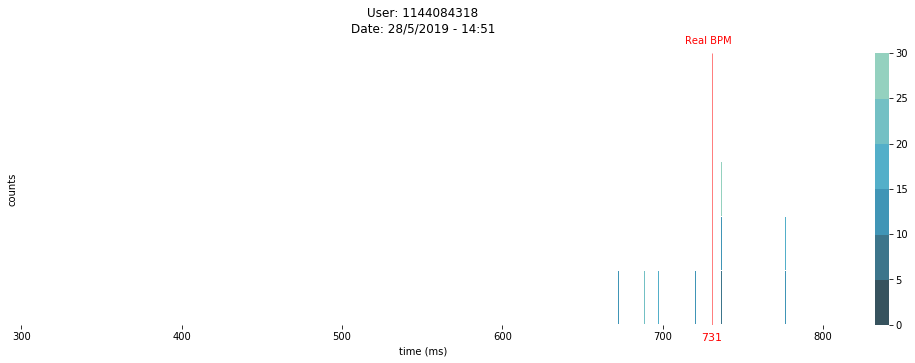

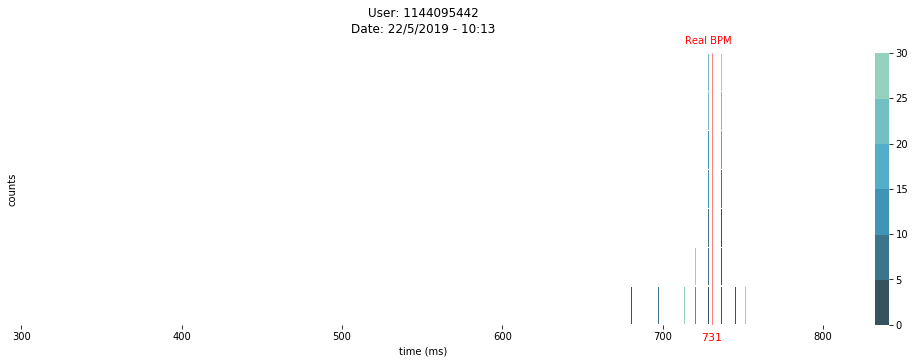

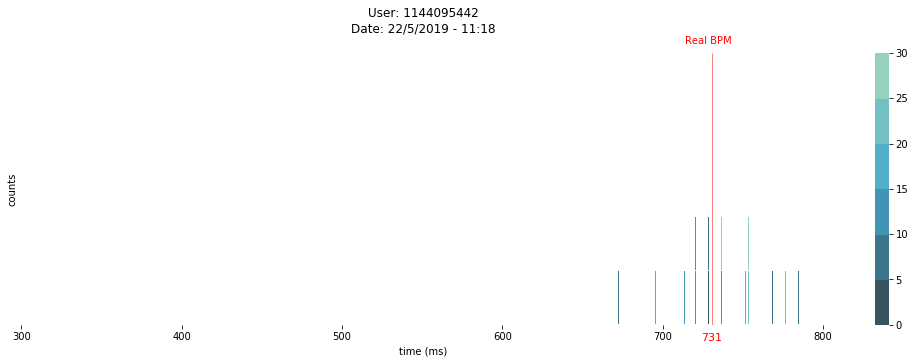

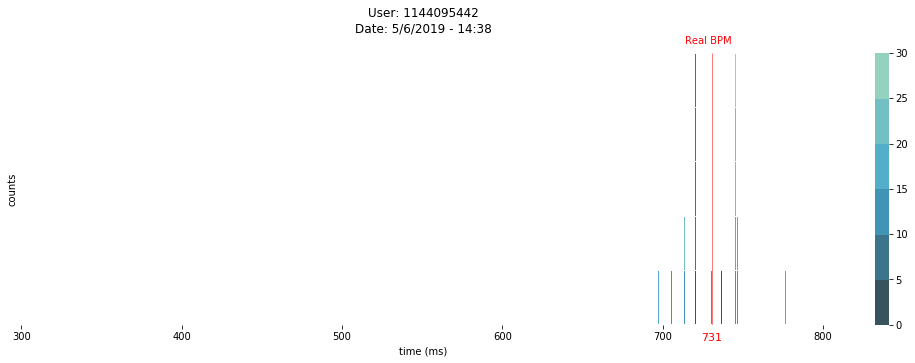

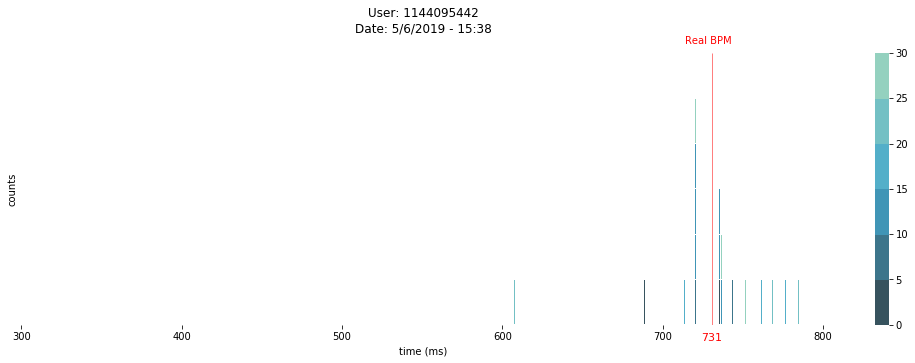

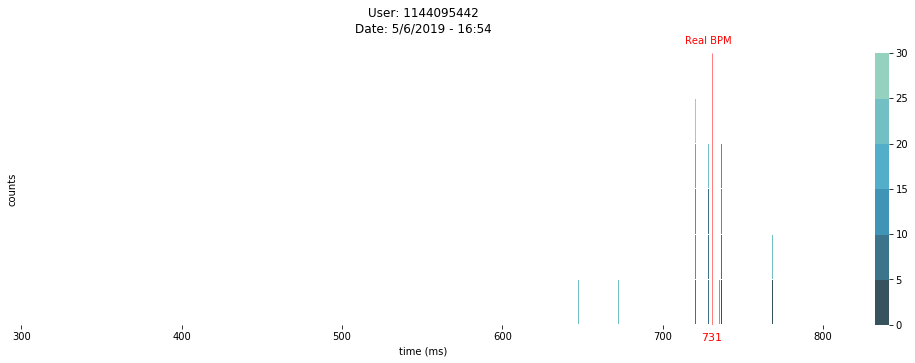

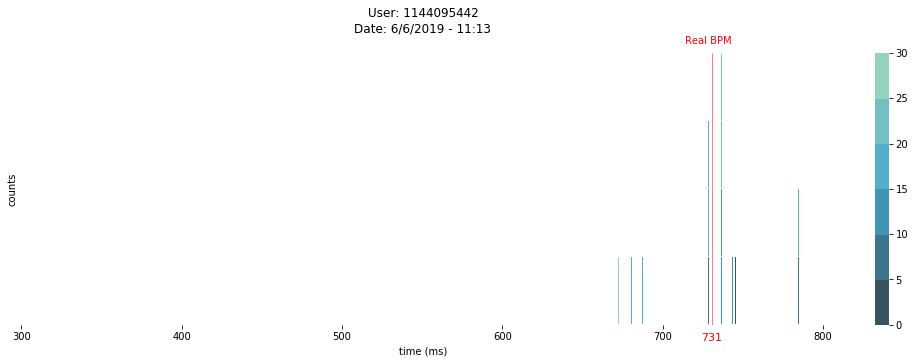

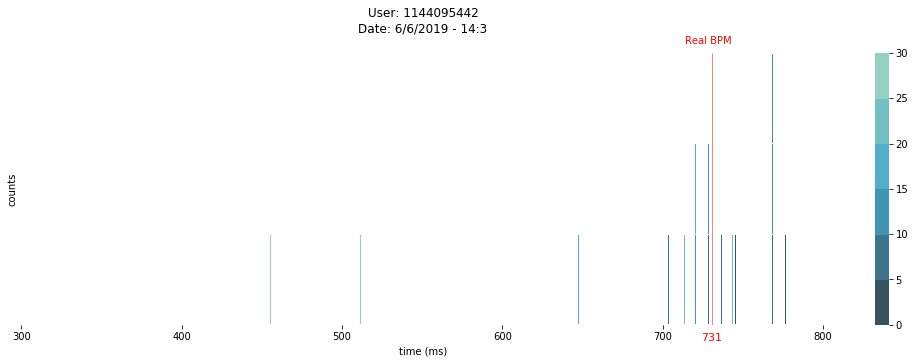

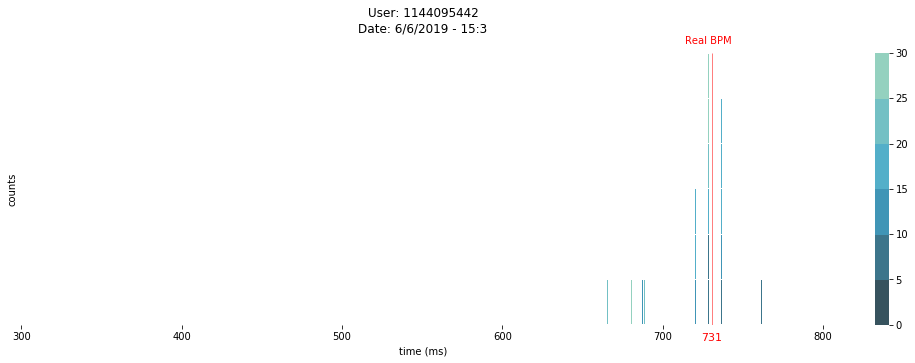

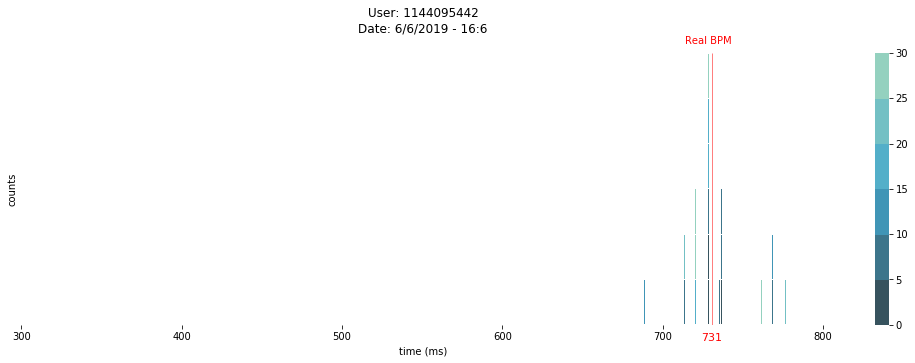

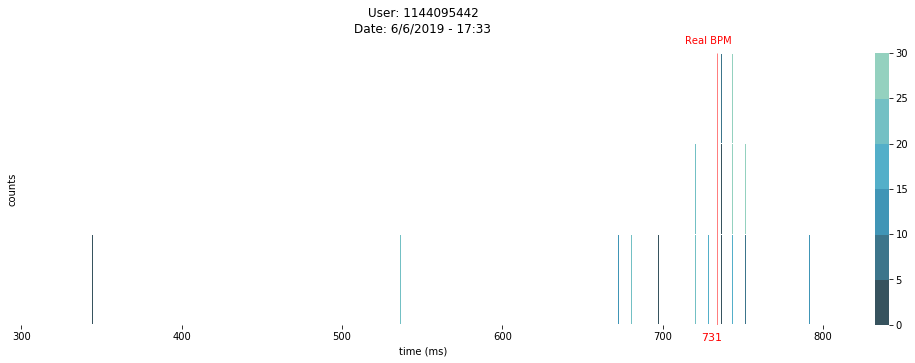

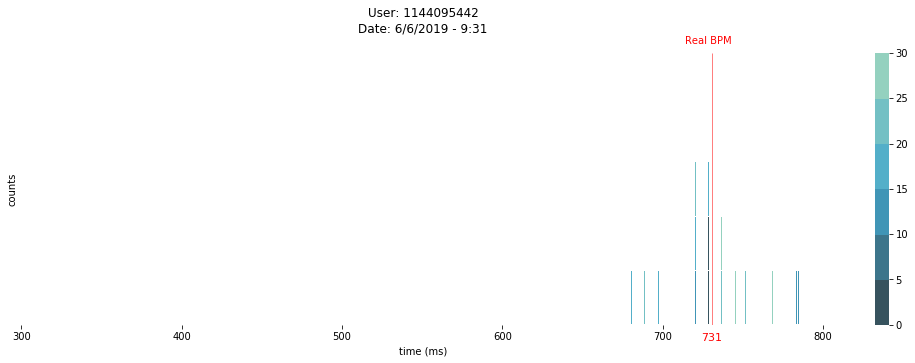

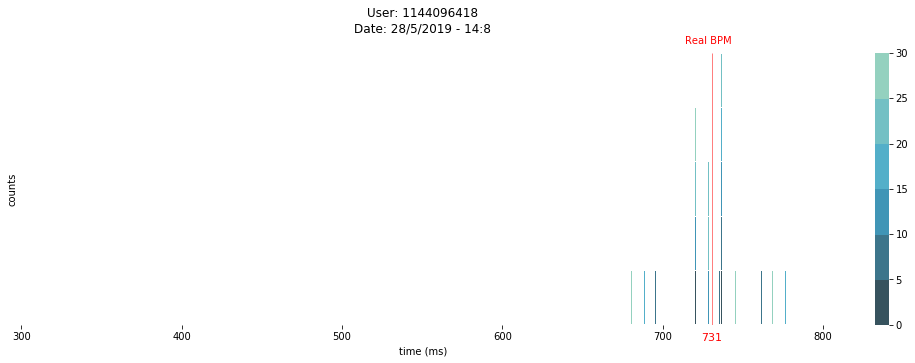

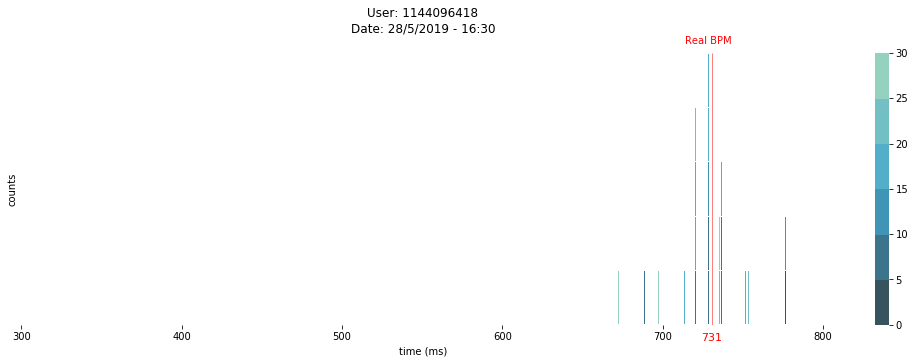

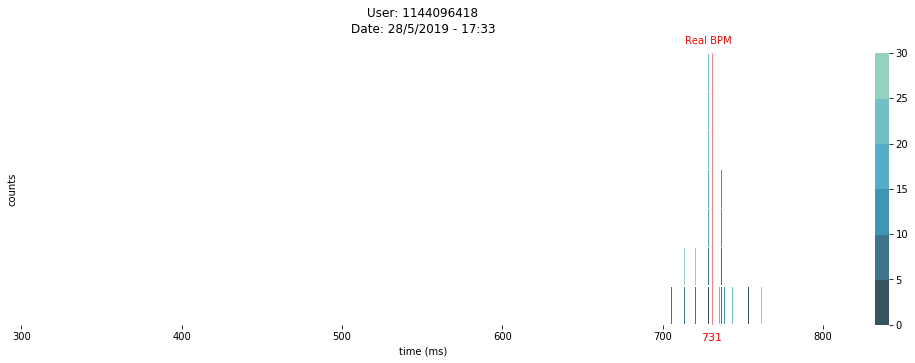

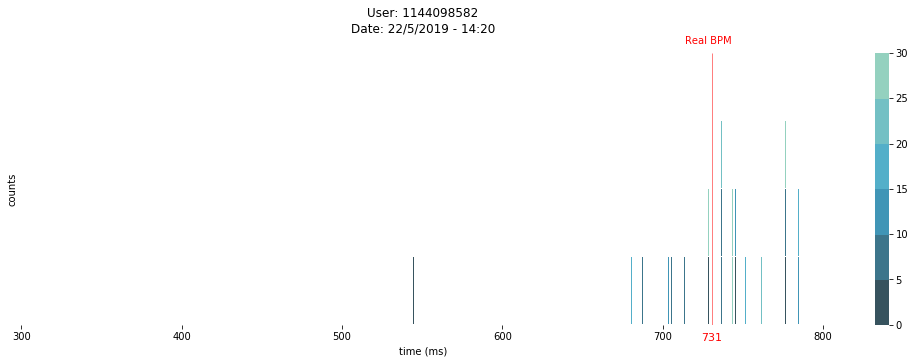

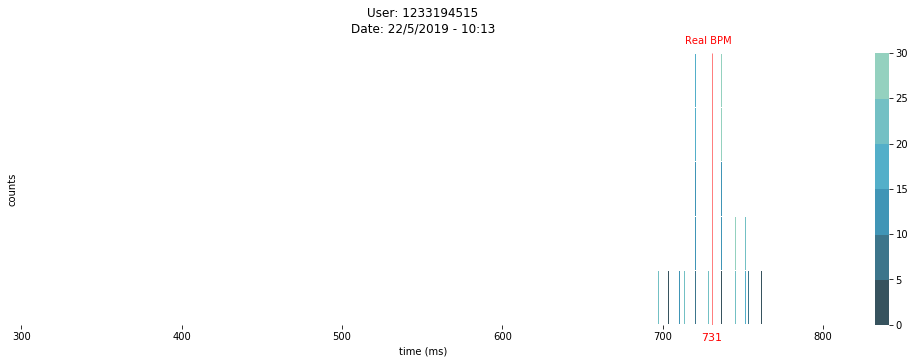

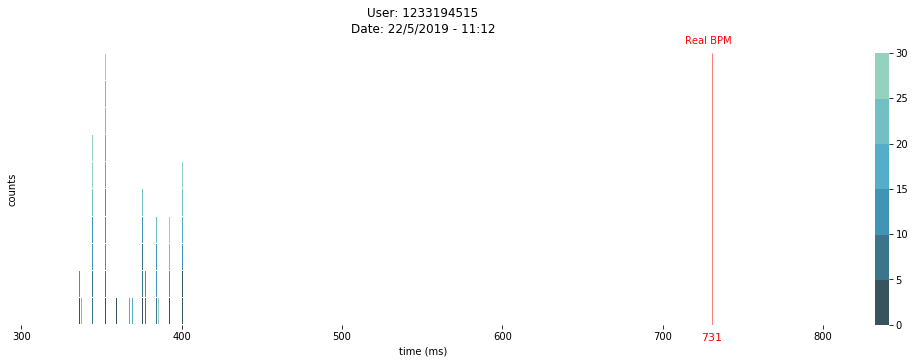

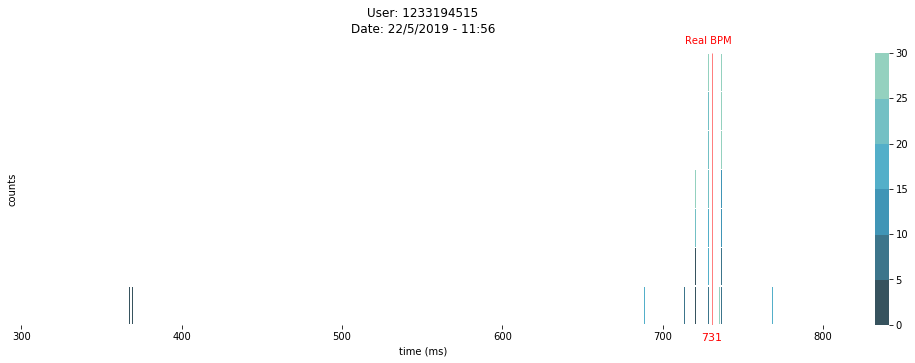

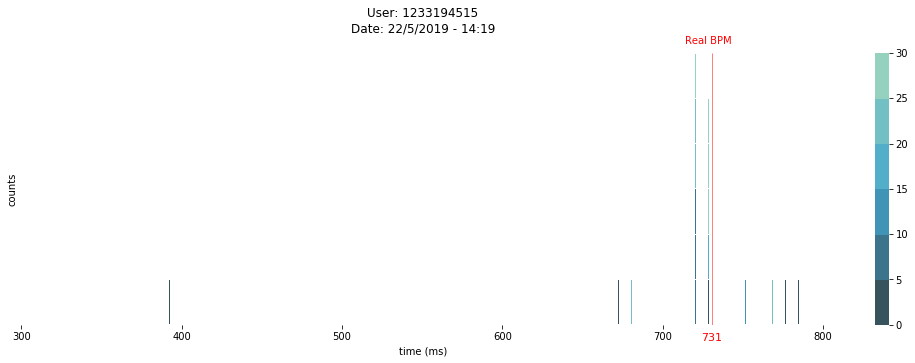

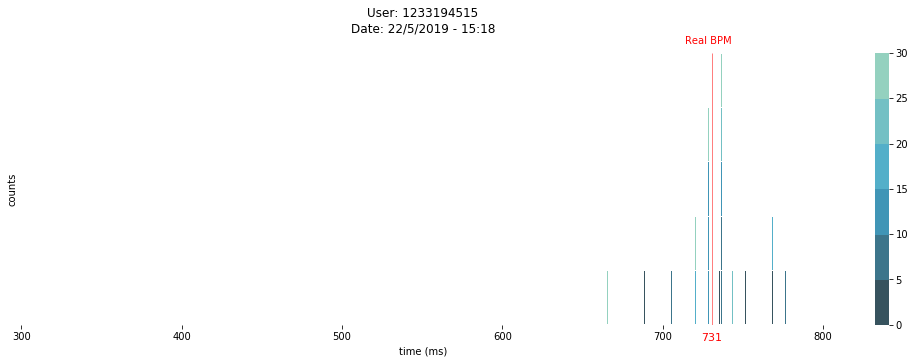

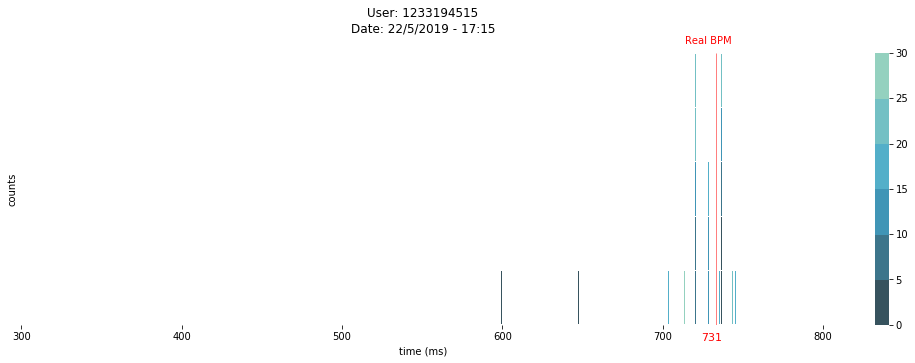

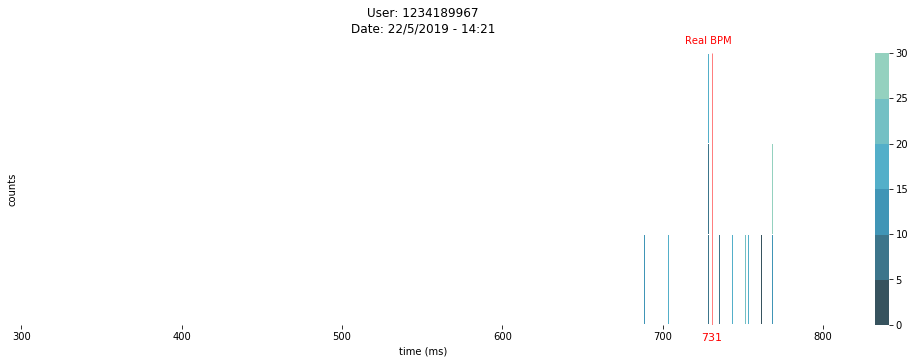

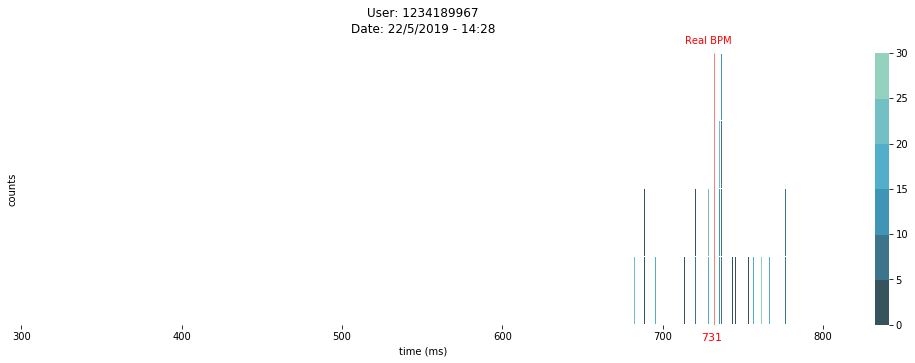

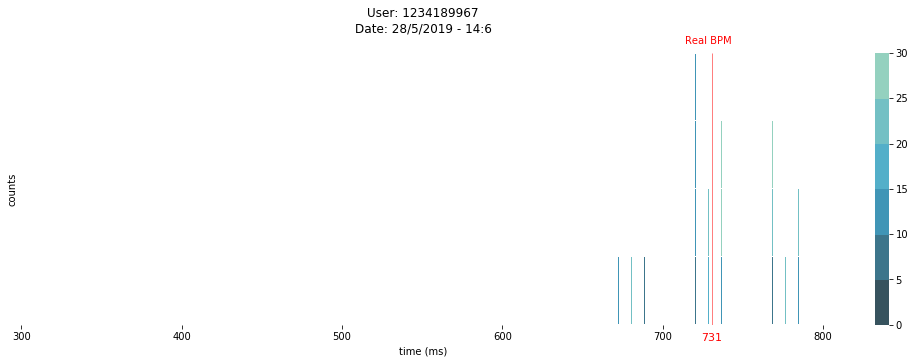

In [3]:
direc = "Data/Individual/"

for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    
   # data = data[(data.value<=(end/1000)) & (data.value>=(start/1000))]
    
#    data[['value']] = data[['value']].astype(str)

    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    #data_cop = data_cop.drop([0],axis=0)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
            
            
    
    num_ticks = 6
# the index of the position of yticks
    xticks = np.linspace(0, len(data_cop.keys())-1, num_ticks, dtype=np.int)
# the content of labels of these yticks
    xtickslabels = [data_cop.keys()[idx] for idx in xticks]
    
    plt.figure(figsize = (18,5)) 
    ax = plt.axes()
    sns.heatmap(data_cop, linewidths=.1 , cmap=sns.color_palette("GnBu_d"), vmin=0, vmax=30, ax=ax, xticklabels=xtickslabels, yticklabels=False)
    ax.invert_yaxis()
    ax.vlines([line+1], *ax.get_ylim(), color ="r", Label="731", linewidth=0.5, linestyles= 'solid')
    ax.set_xticks(xticks)
    #ax.text(0.05, 0.98, "Text", ha="right", va="top", transform=ax.transAxes)
    ax.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=10)
    ax.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=11)
    data_aux = file.split(".")
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
    date_aux = data_aux[1].split("-")
    plt.title("User: "+data_aux[0]+"\n"+"Date: "+date_aux[0]+"/"+date_aux[1]+"/2019 - "+date_aux[2][1:]+":"+date_aux[3]+"\n")
    plt.xlabel("time (ms)")
    #plt.text(415,13.5, "Real BPM", color='Red')
    #plt.text(425,-0.75, "731", fontsize=10)
    plt.xticks( rotation='horizontal')
    plt.show()

## Heatmap that contains all the delays from one user.

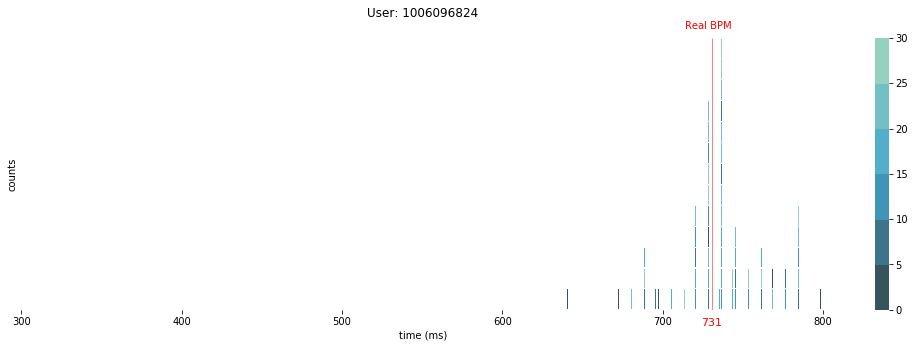

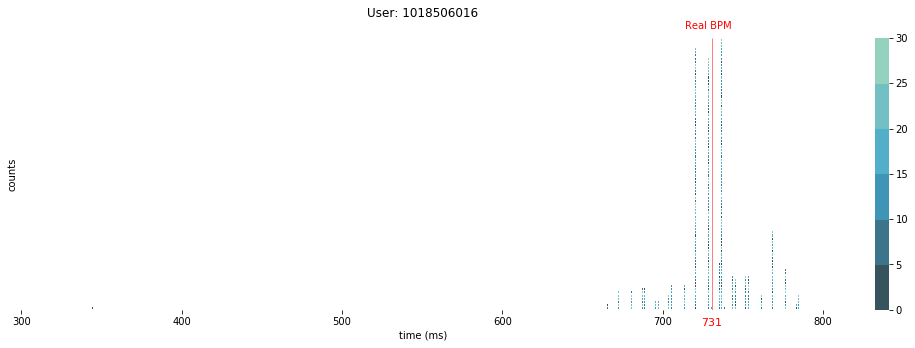

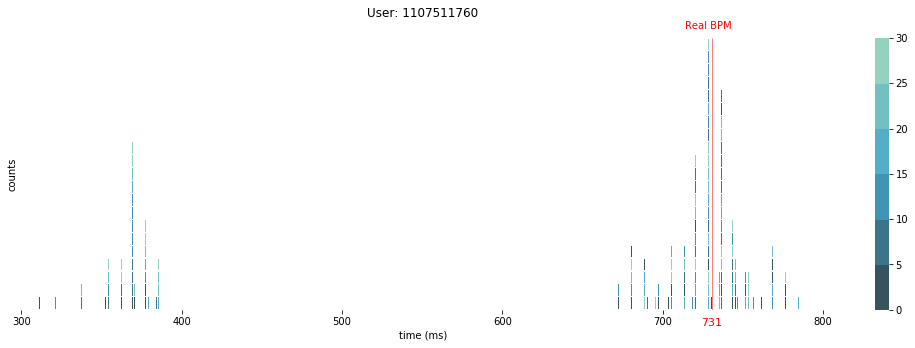

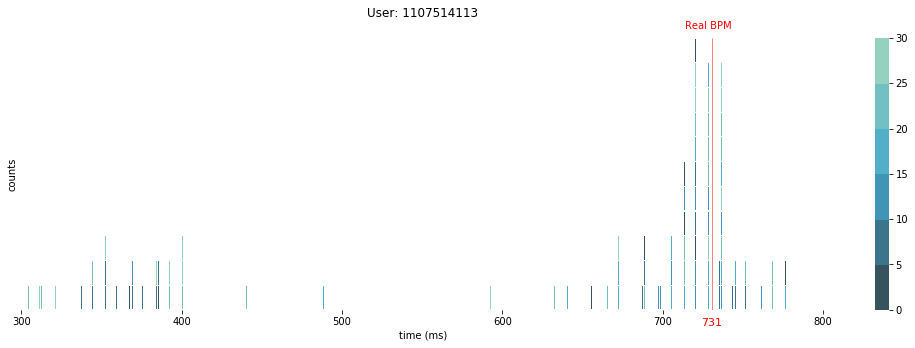

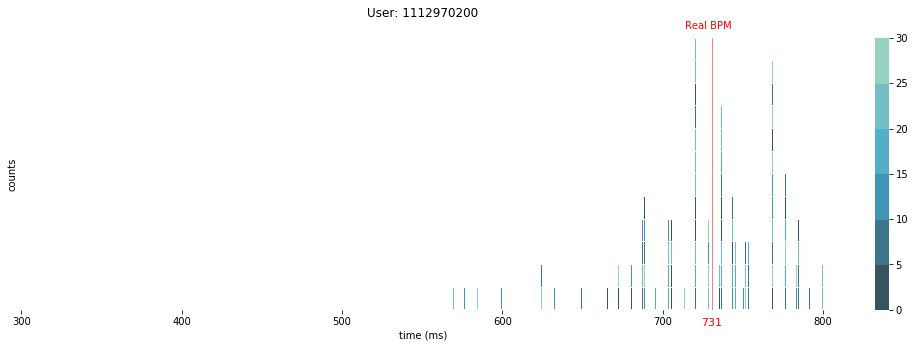

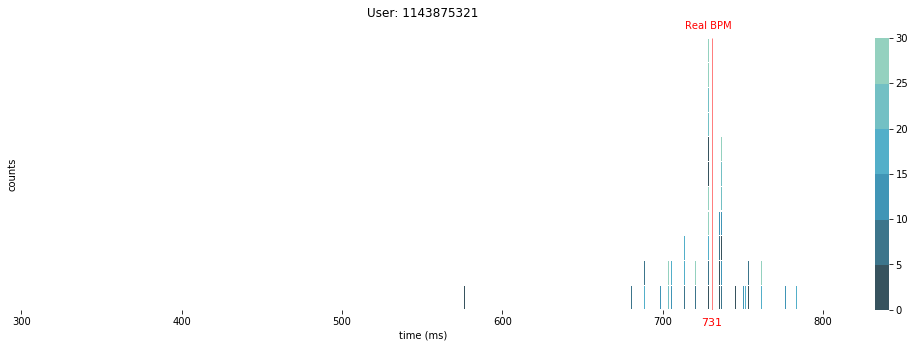

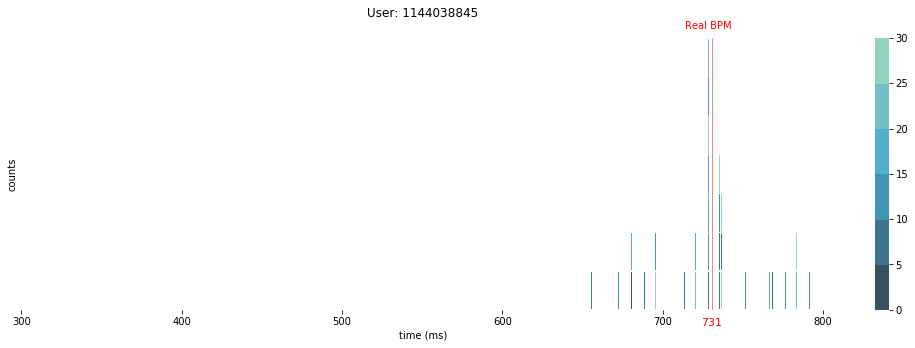

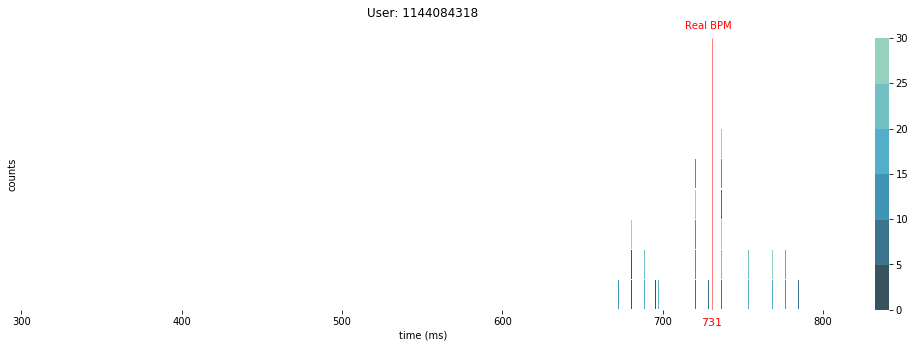

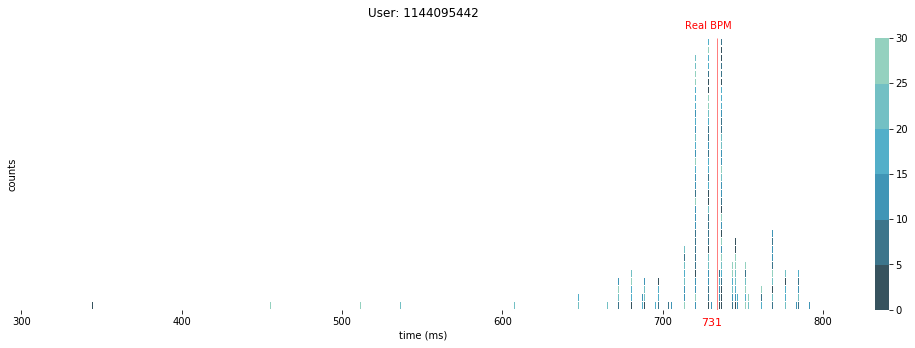

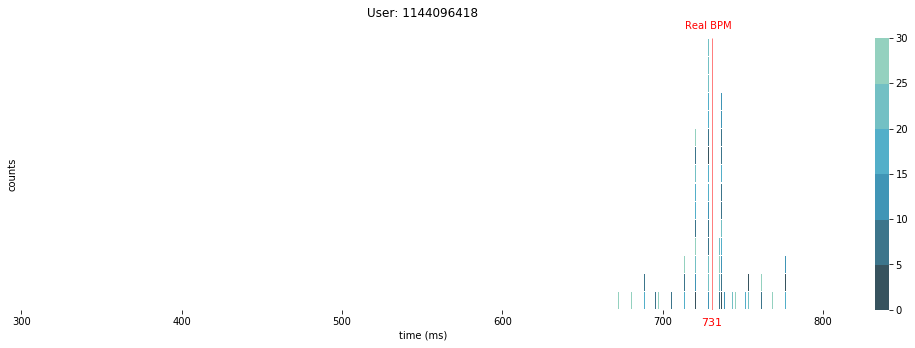

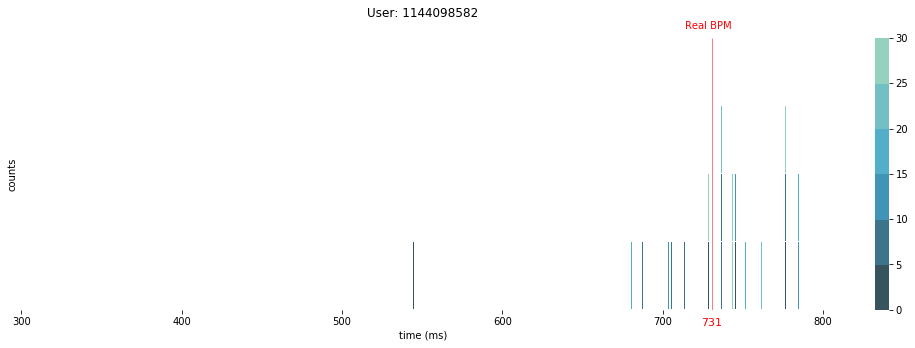

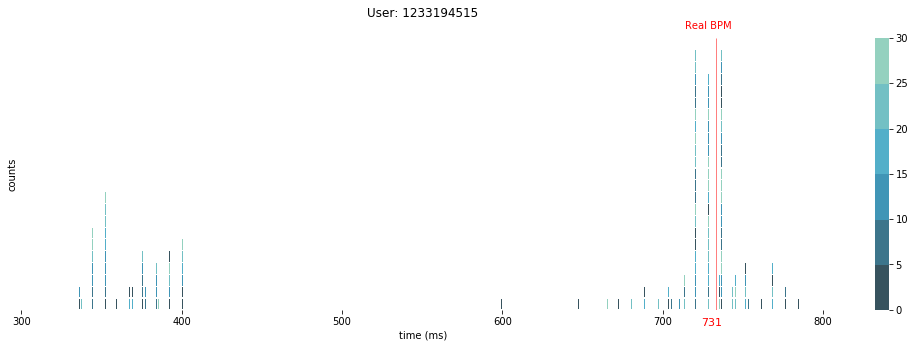

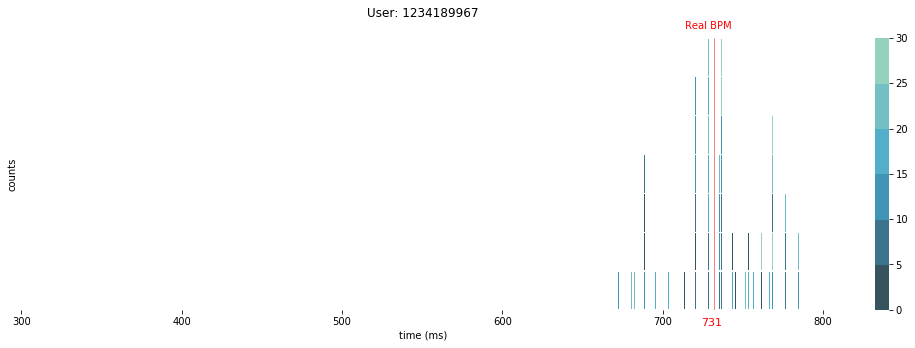

In [4]:
direc = "Data/Global/"

for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    
   # data = data[(data.value<=(end/1000)) & (data.value>=(start/1000))]
    
#    data[['value']] = data[['value']].astype(str)

    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    #data_cop = data_cop.drop([0],axis=0)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
            
            
    
    num_ticks = 6
# the index of the position of yticks
    xticks = np.linspace(0, len(data_cop.keys())-1, num_ticks, dtype=np.int)
# the content of labels of these yticks
    xtickslabels = [data_cop.keys()[idx] for idx in xticks]
    
    plt.figure(figsize = (18,5)) 
    ax = plt.axes()
    sns.heatmap(data_cop, linewidths=.1 , cmap=sns.color_palette("GnBu_d"), vmin=0, vmax=30, ax=ax, xticklabels=xtickslabels, yticklabels=False)
    ax.invert_yaxis()
    ax.vlines([line+1], *ax.get_ylim(), color ="r", Label="731", linewidth=0.5, linestyles= 'solid')
    ax.set_xticks(xticks)
    #ax.text(0.05, 0.98, "Text", ha="right", va="top", transform=ax.transAxes)
    ax.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=10)
    ax.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=11)
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
    plt.title("User: "+data_aux[0]+"\n")
    plt.xlabel("time (ms)")
    #plt.text(415,13.5, "Real BPM", color='Red')
    #plt.text(425,-0.75, "731", fontsize=10)
    plt.xticks( rotation='horizontal')
    plt.show()

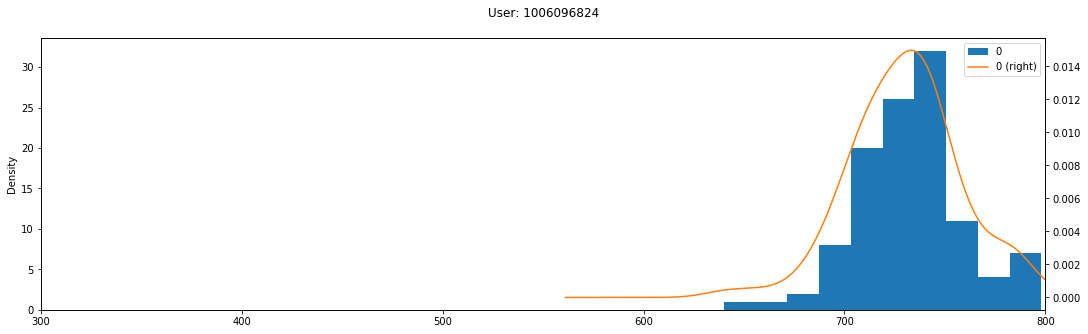

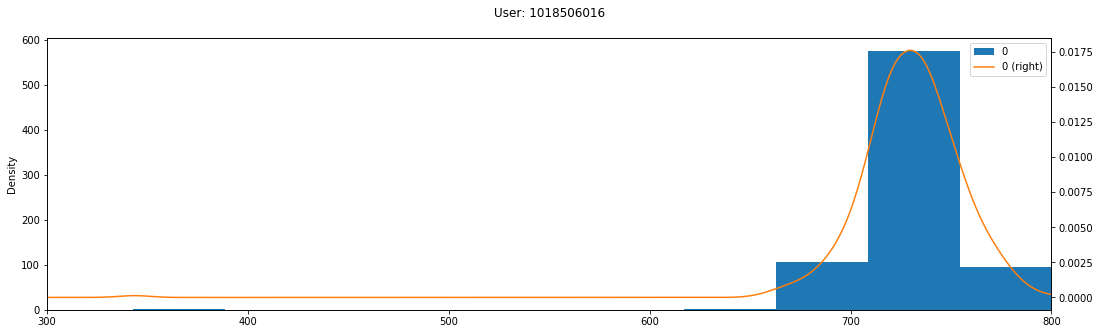

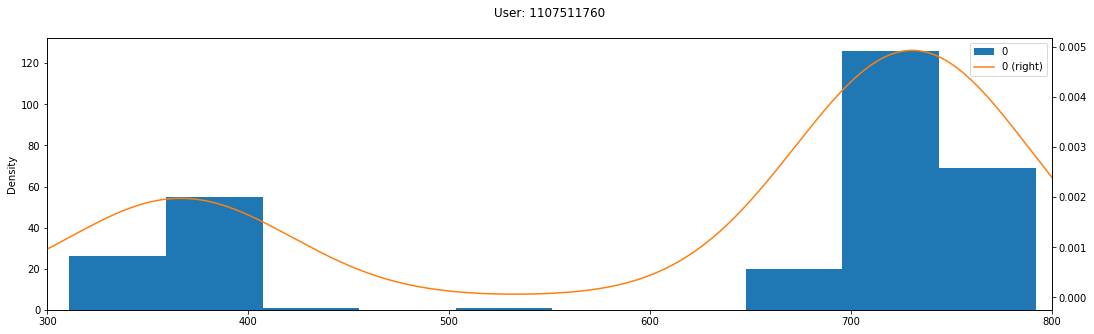

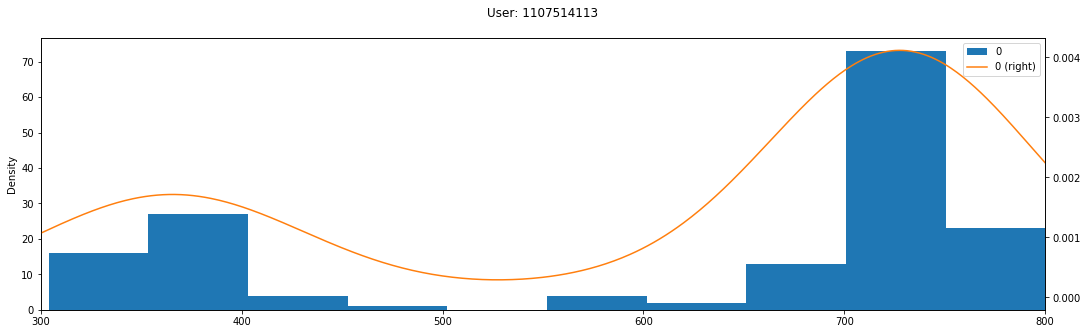

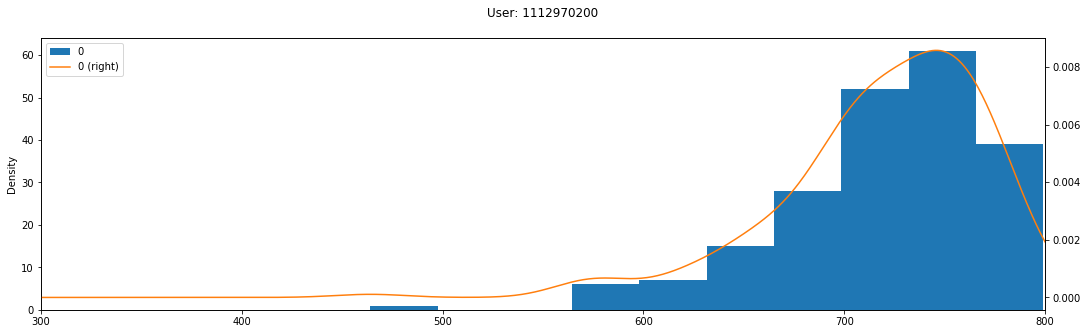

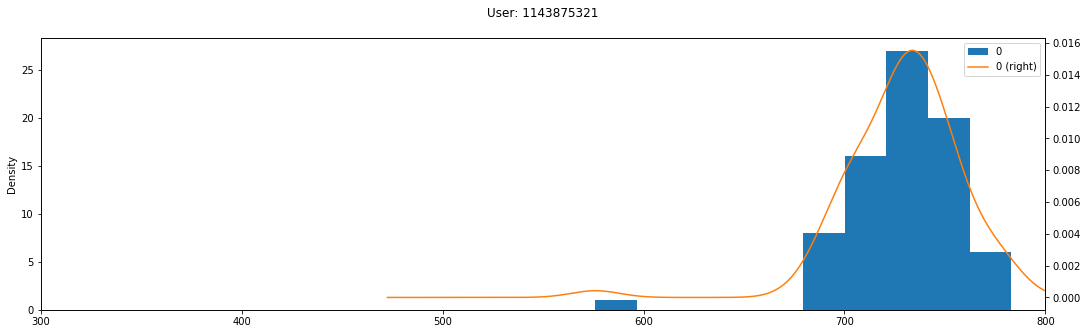

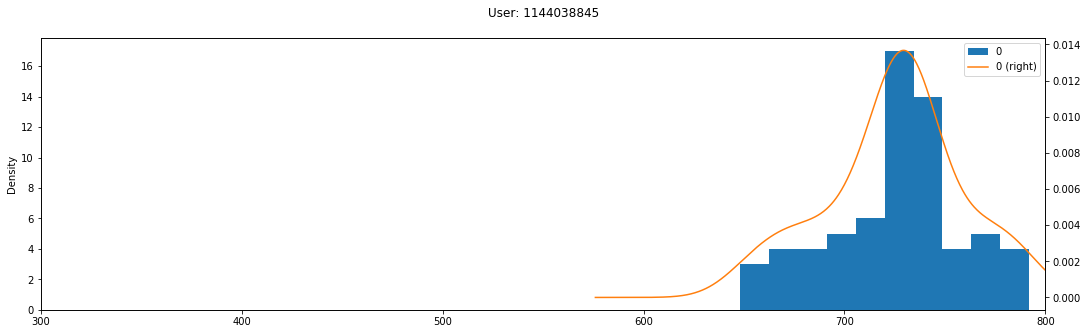

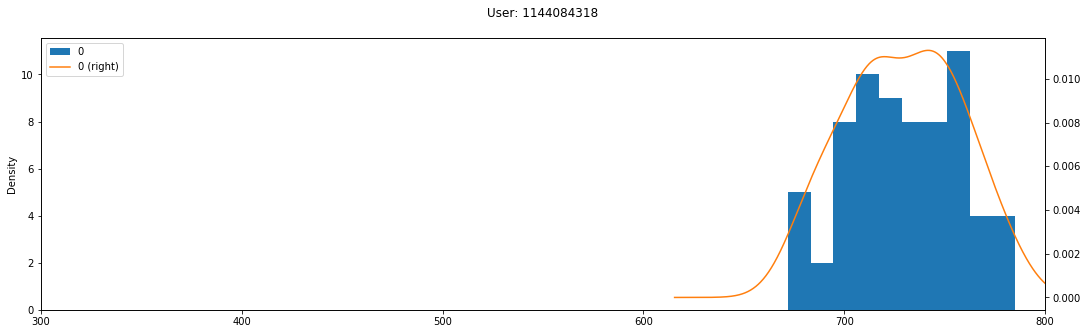

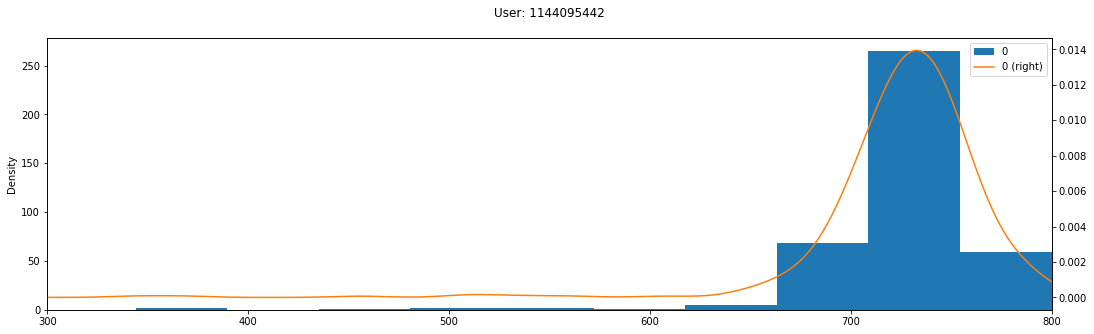

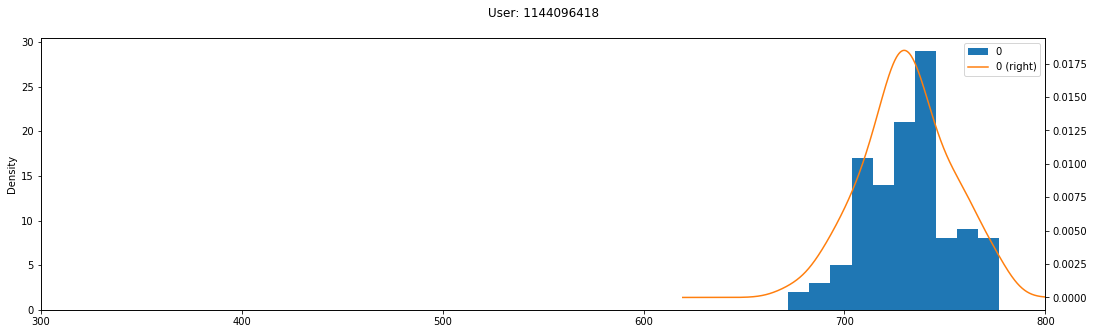

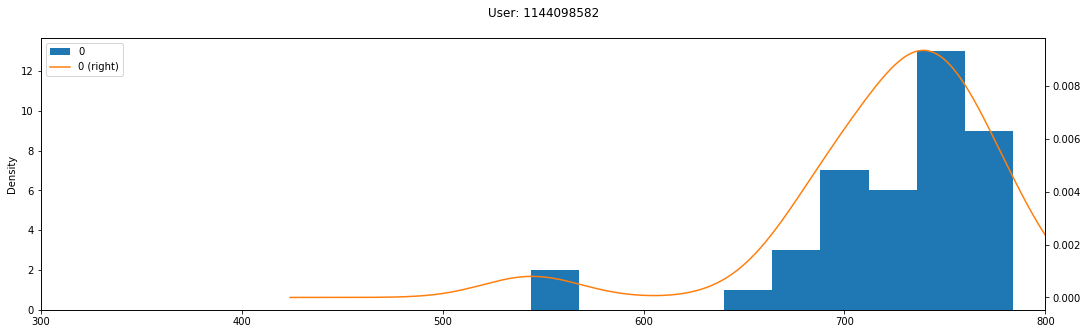

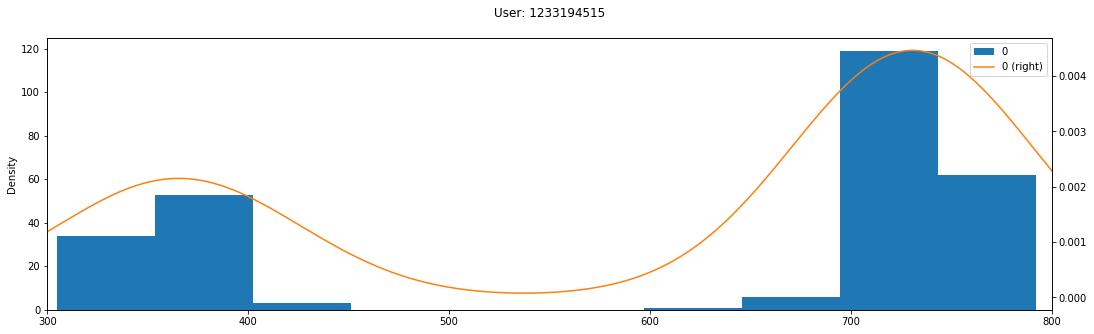

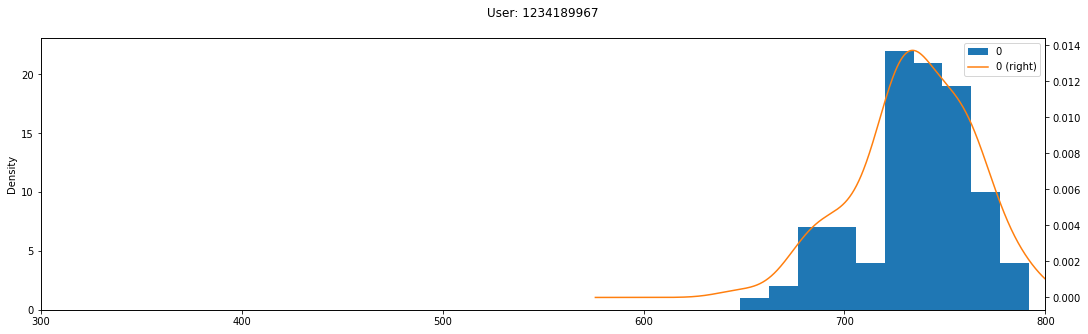

In [5]:
# Method to transform data 
direc = "Data/Global_Counts/"

for file in os.listdir(direc):
    data = pd.read_csv(os.path.join(direc, file))
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
     
    list_counts = []
    for index, row in data.iterrows():

        act_x = row[1]
        while act_x > 0:
            list_counts.append(int(row[0]))
            act_x = act_x - 1

    df = pd.DataFrame(list_counts)
        
    plt.figure(figsize = (18,5))
    ax = plt.axes()
    df.plot(kind='hist', xlim = (300, 800), ax = ax)
    df.plot(kind='kde', ax=ax, secondary_y=True)
    plt.title("User: "+data_aux[0]+"\n")
    plt.show()

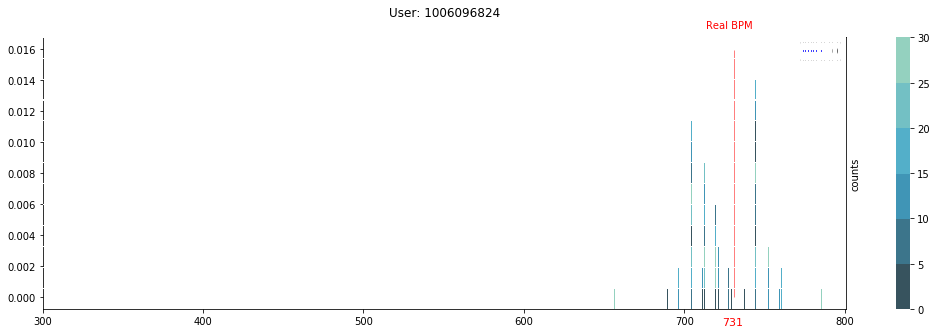

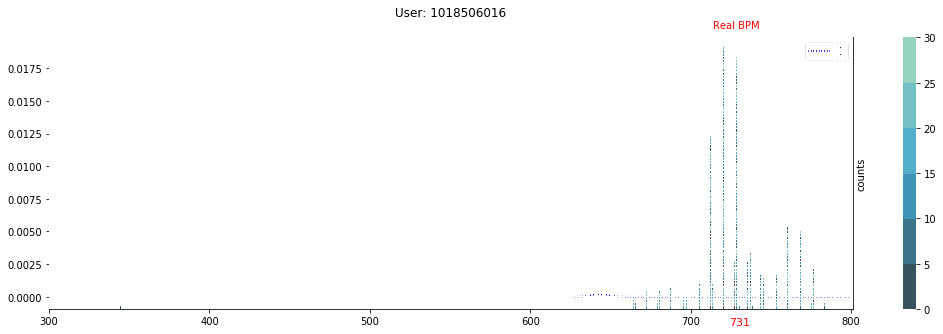

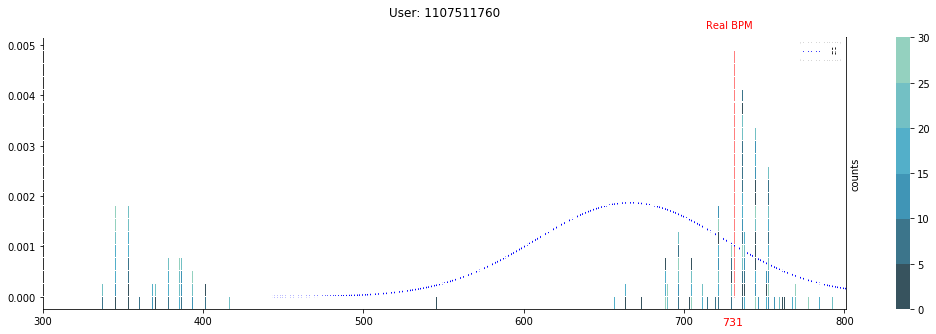

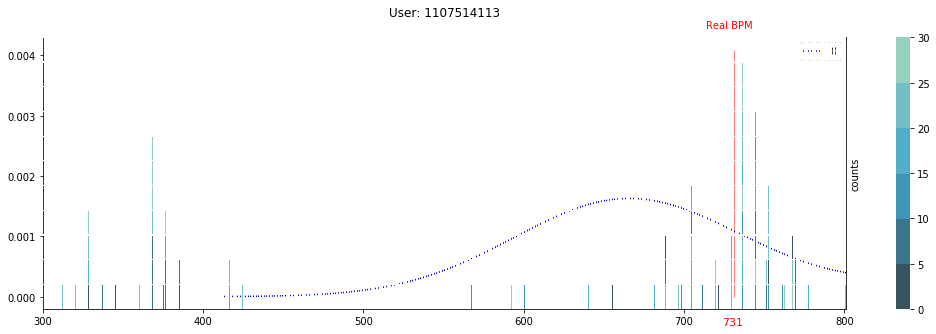

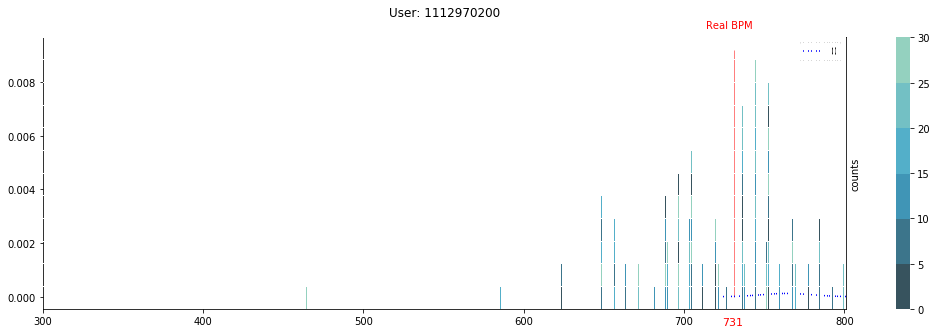

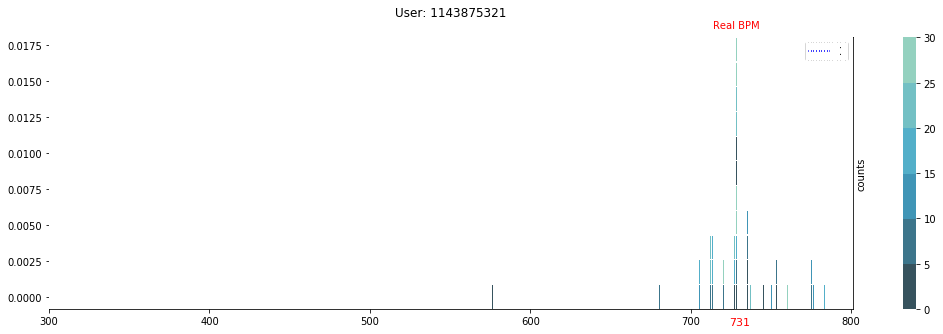

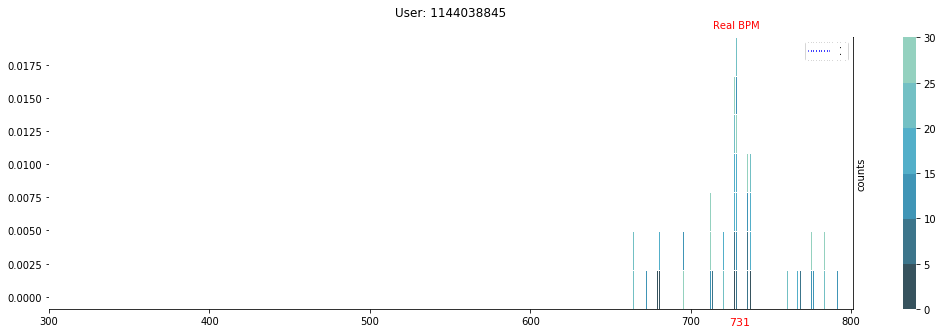

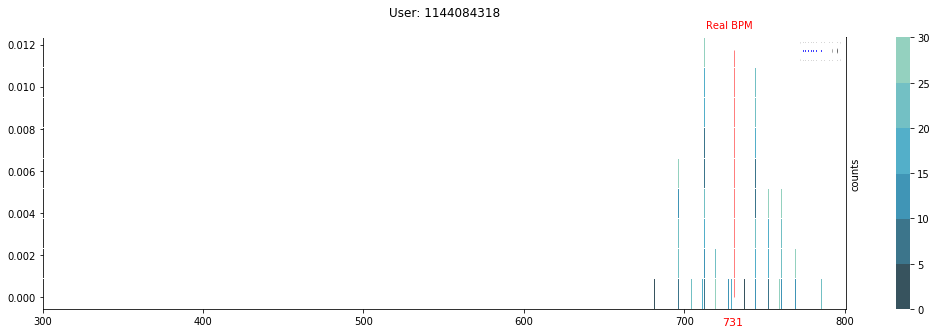

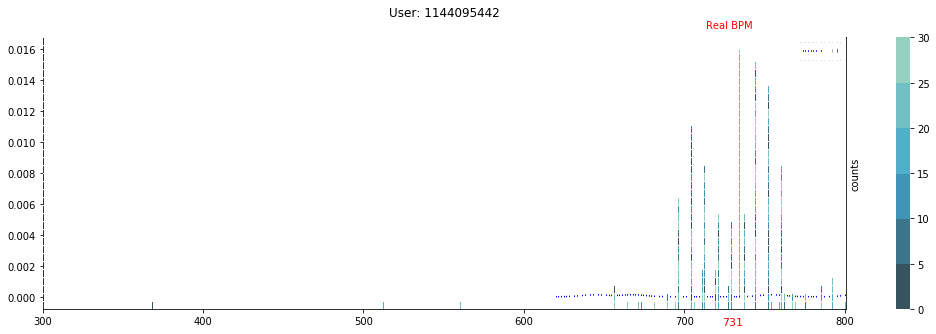

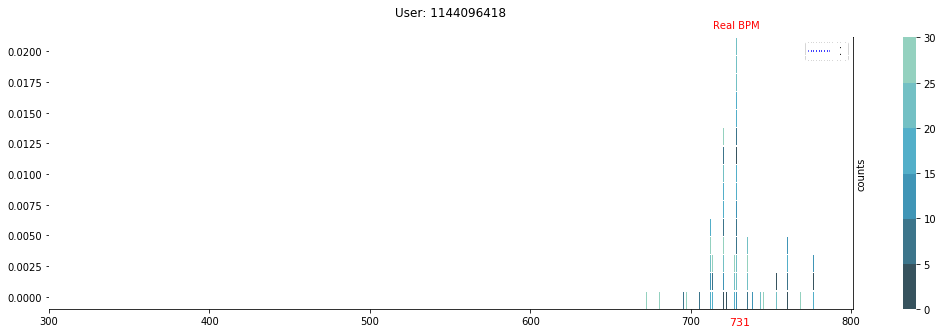

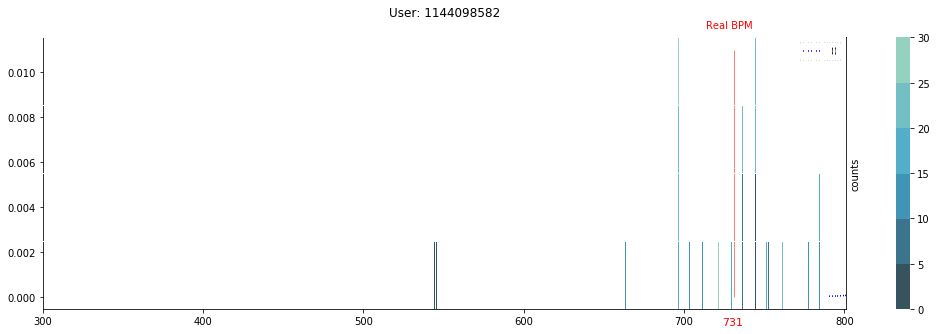

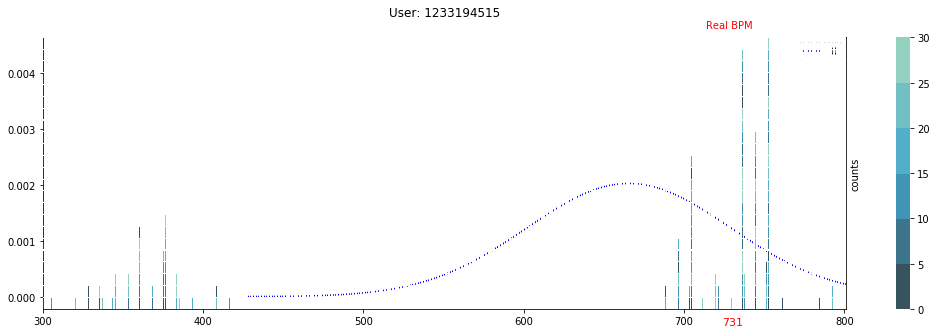

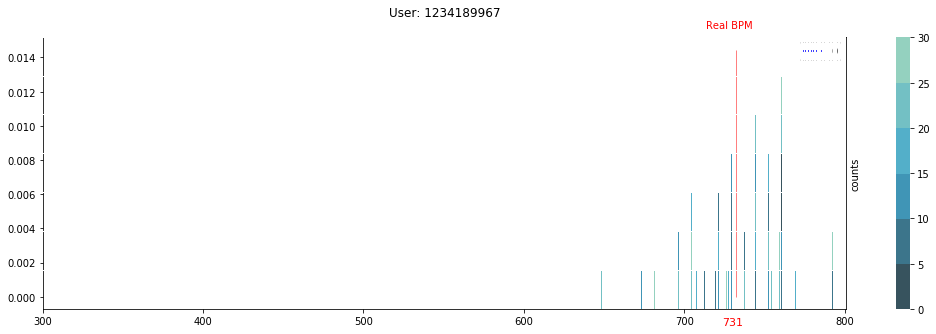

In [6]:
direc = "Data/Global/"
direc_counts = "Data/Global_Counts/"
for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    data_counts = pd.read_csv(os.path.join(direc_counts, file))
    
    #create the kde line
    
    list_counts = []
    for index, row in data_counts.iterrows():

        act_x = row[1]
        while act_x > 0:
            list_counts.append(int(row[0]))
            act_x = act_x - 1

    df = pd.DataFrame(list_counts)

    
    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    #data_cop = data_cop.drop([0],axis=0)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
            
            
    
    num_ticks = 6
# the index of the position of yticks
    xticks = np.linspace(0, len(data_cop.keys())-1, num_ticks, dtype=np.int)
# the content of labels of these yticks
    xtickslabels = [data_cop.keys()[idx] for idx in xticks]
    
    #plt.figure(figsize = (18,5)) 
    #ax = plt.axes()
    
    fig, ax = plt.subplots(figsize = (18,5))
    #sb.regplot(x='round', y='money', data=firm, ax=ax)
    
    #sb.regplot(x='round', y='dead', data=firm, ax=ax2, color='r')
    #sb.plt.show()
    
# KDE
    #sns.distplot(df[0], hist=True, rug=True, ax=ax);
    sns.kdeplot(df[0], ax=ax, color='b')
    ax2 = ax.twinx()
# HEATMAP
    sns.heatmap(data_cop, linewidths=.1 , cmap=sns.color_palette("GnBu_d"), vmin=0, vmax=30, ax=ax2, xticklabels=xtickslabels, yticklabels=False)
    
    ax2.invert_yaxis()
    ax.vlines([line+1], *ax.get_ylim(), color ="r", Label="731", linewidth=0.5, linestyles= 'solid')
    ax.set_xticks(xticks)
    
    ax.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=10)
    
    ax.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=11)
    
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
    plt.title("User: "+data_aux[0]+"\n")
    plt.xlabel("time (ms)")
    plt.xticks(rotation='horizontal')
    plt.show()

In [7]:
data_cop

value,300,301,302,303,304,305,306,307,308,309,...,791,792,793,794,795,796,797,798,799,800
counts,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.366879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.175267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


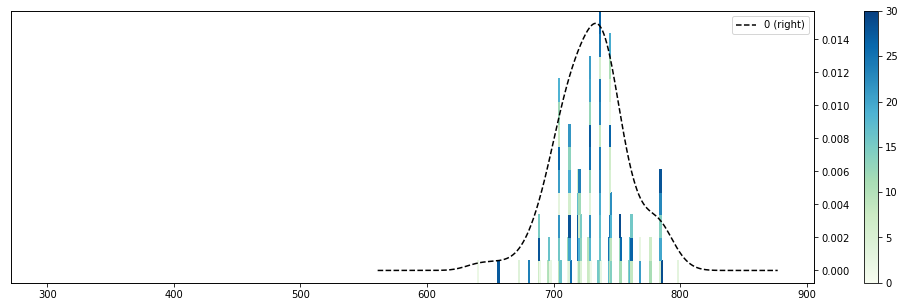

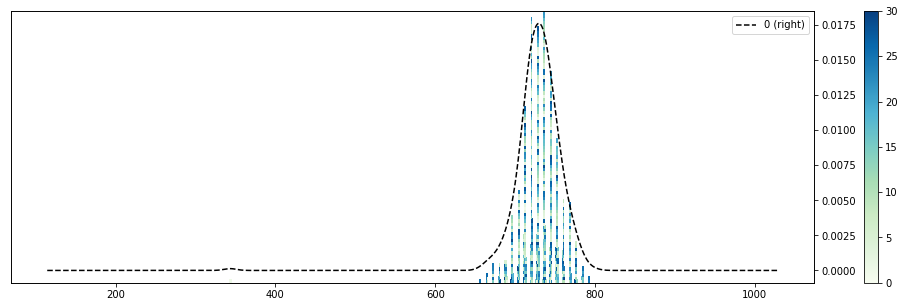

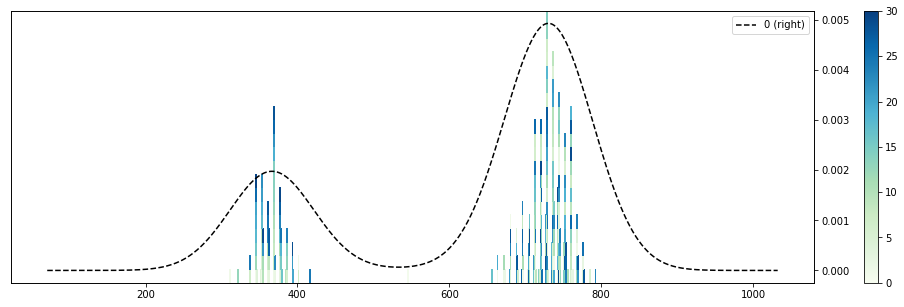

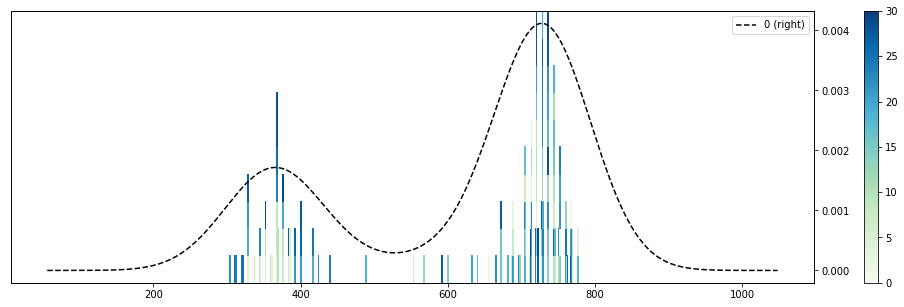

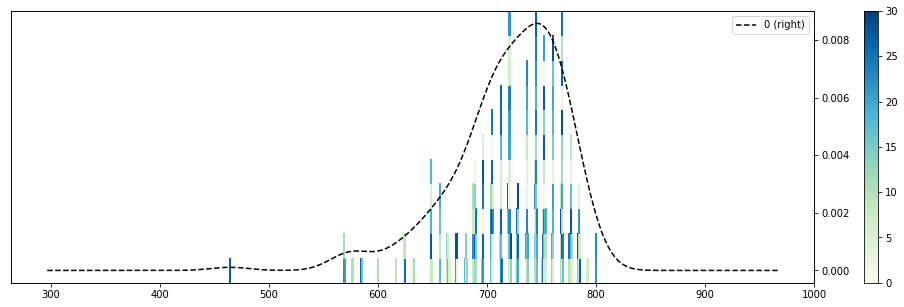

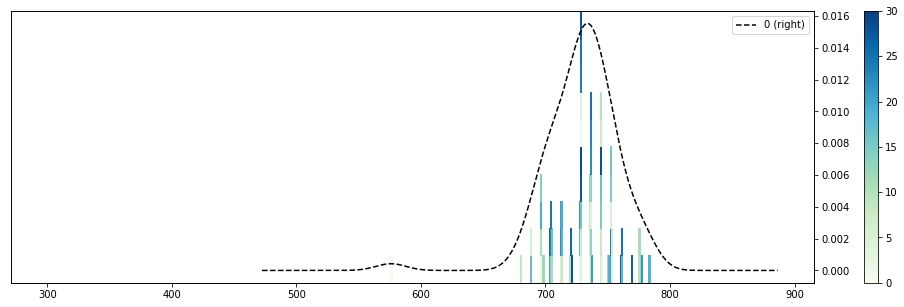

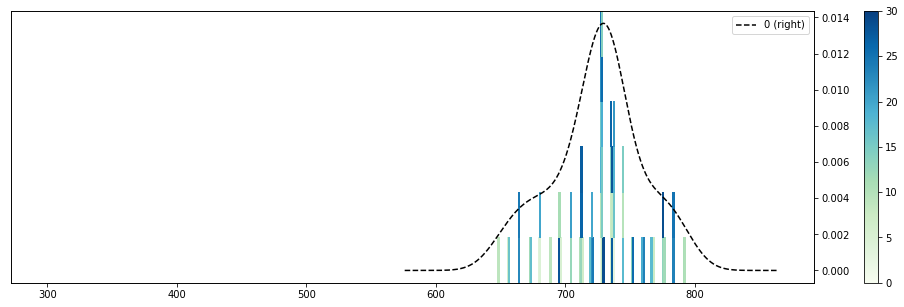

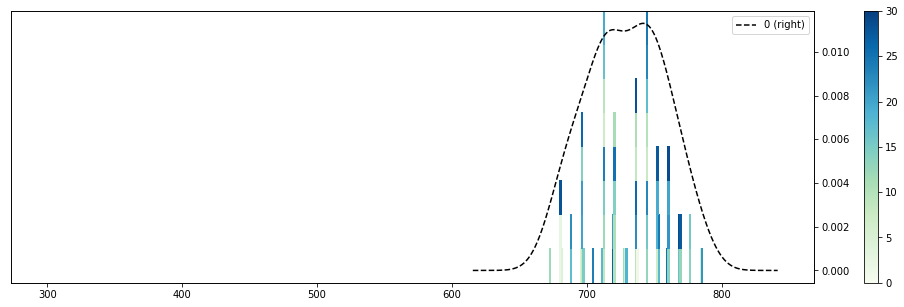

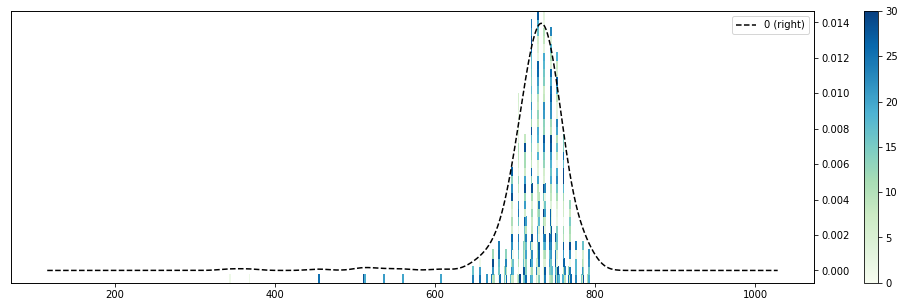

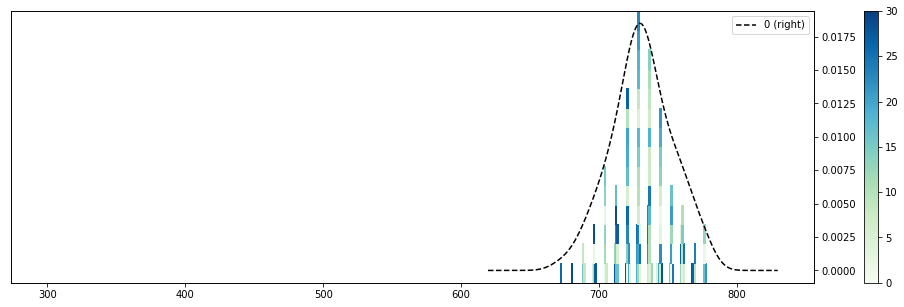

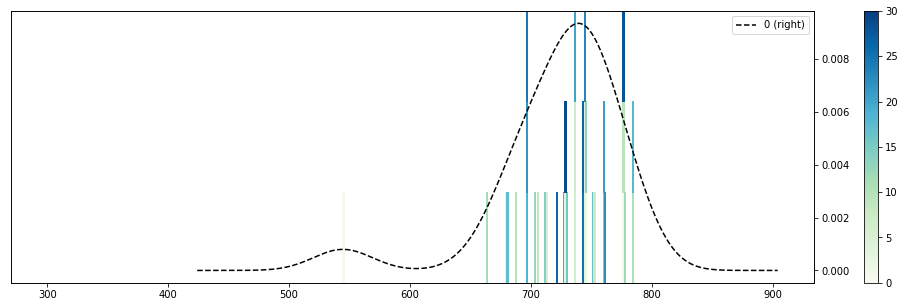

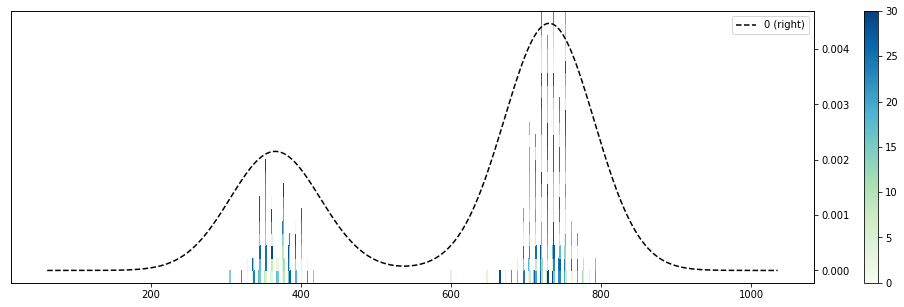

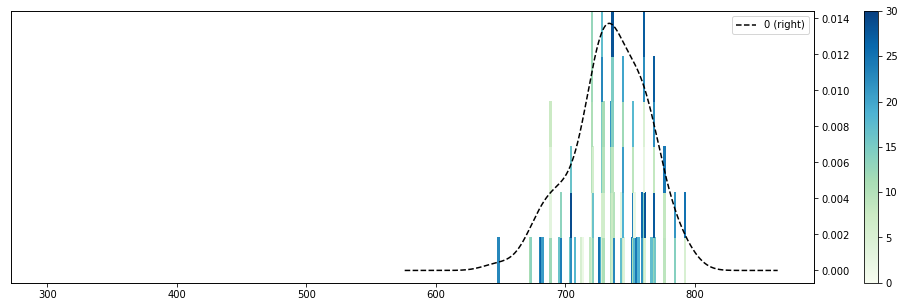

In [8]:
direc = "Data/Global/"
direc_counts = "Data/Global_Counts/"
for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    data_counts = pd.read_csv(os.path.join(direc_counts, file))
    
    #create the kde line
    
    list_counts = []
    for index, row in data_counts.iterrows():

        act_x = row[1]
        while act_x > 0:
            list_counts.append(int(row[0]))
            act_x = act_x - 1

    df = pd.DataFrame(list_counts)

    
    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    #data_cop = data_cop.drop([0],axis=0)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
  
    x = list(data_cop.columns)
    y = list(data_cop.index)
    z = np.asmatrix(data_cop.values)
    plt.figure(figsize = (18,5))
    ax = plt.axes()
    
    c = plt.pcolor(x, y, np.array(z), cmap="GnBu", vmin=0, vmax=30)
    #ax.set_xticklabels(x)
    df.plot(kind='kde', ax= ax, secondary_y=True , linestyle="--", color = "black")
    ax.set_yticklabels(y)
    fig.colorbar(c, ax=ax)

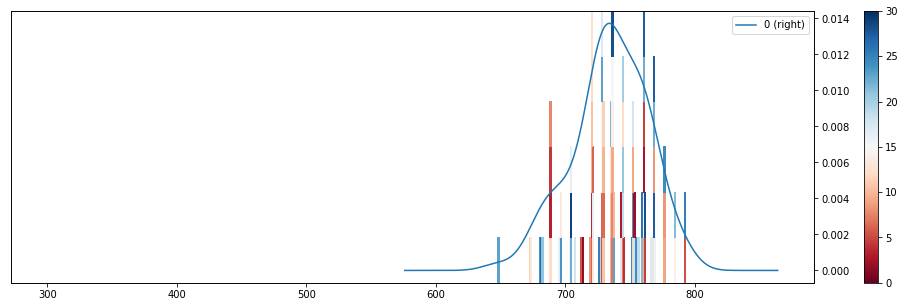

In [9]:
x = list(data_cop.columns)
y = list(data_cop.index)
z = np.asmatrix(data_cop.values)
plt.figure(figsize = (18,5))
ax = plt.axes()
c = plt.pcolor(x, y, np.array(z), cmap='RdBu', vmin=0, vmax=30)
#ax.set_xticklabels(x)
df.plot(kind='kde', ax= ax, secondary_y=True)
fig.colorbar(c, ax=ax)

In [10]:
data_cop.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [11]:
x

[300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466

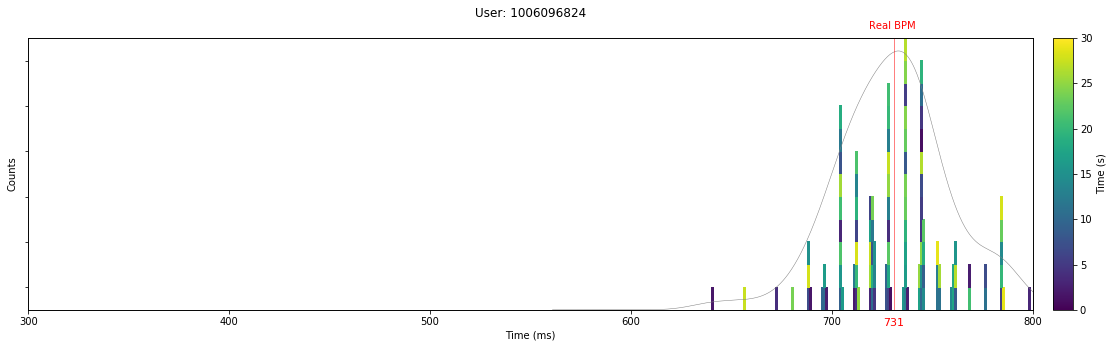

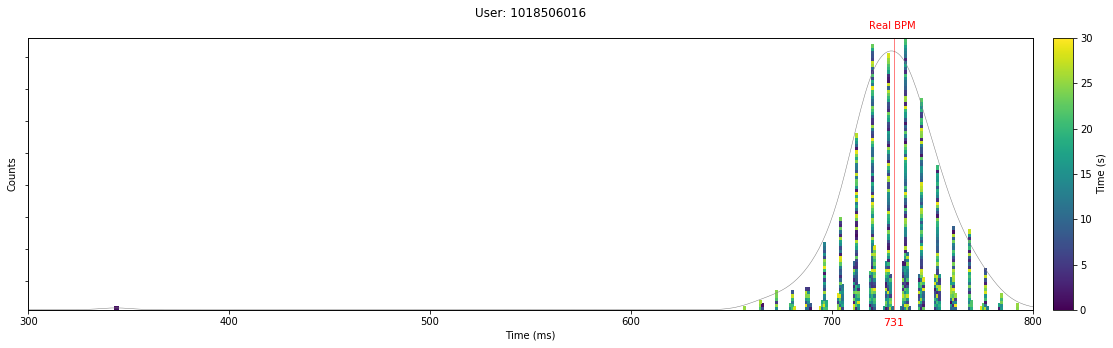

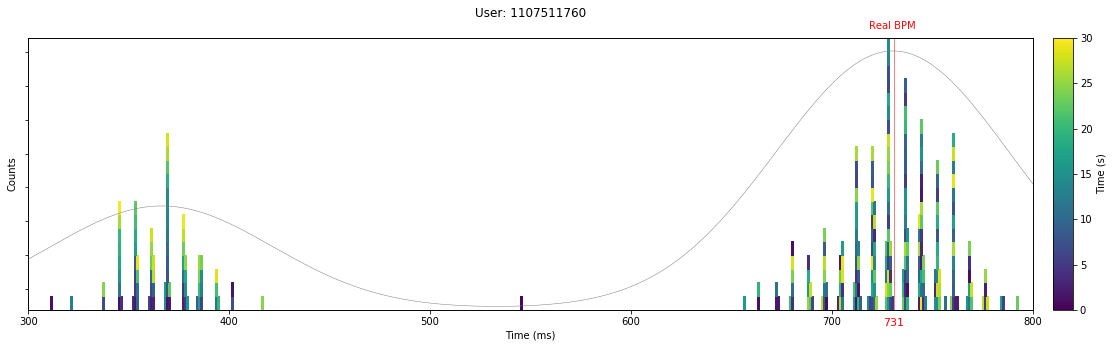

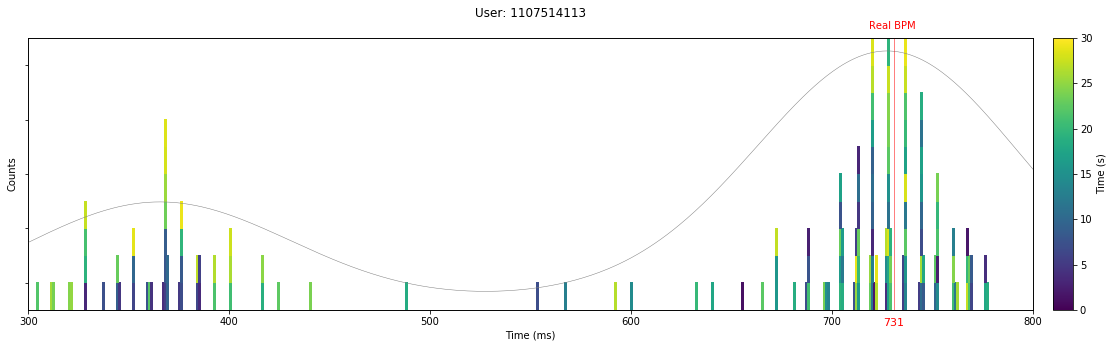

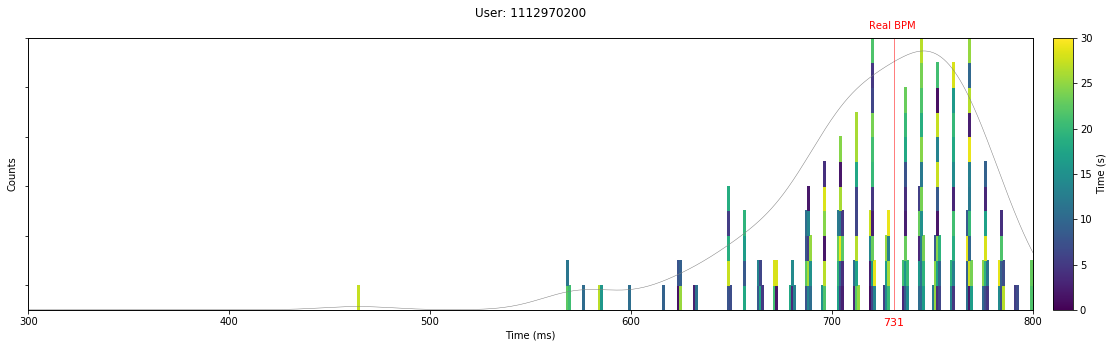

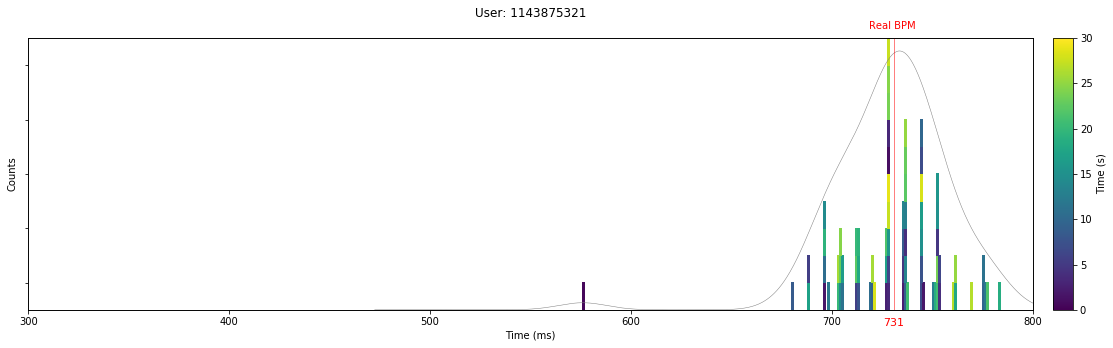

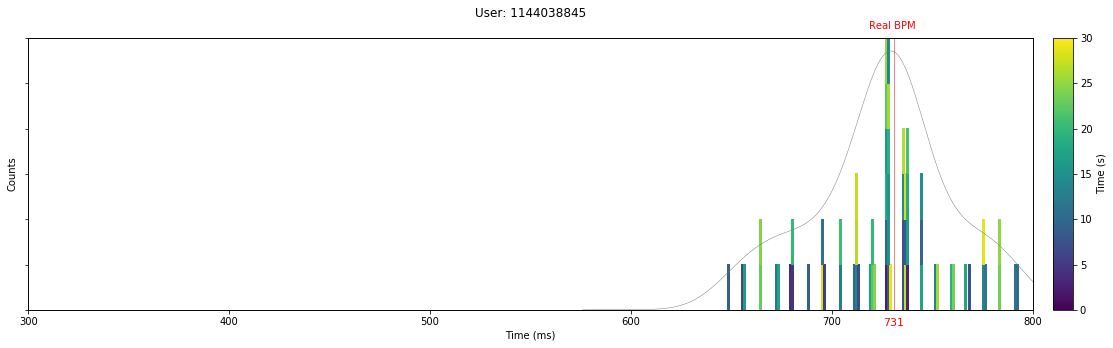

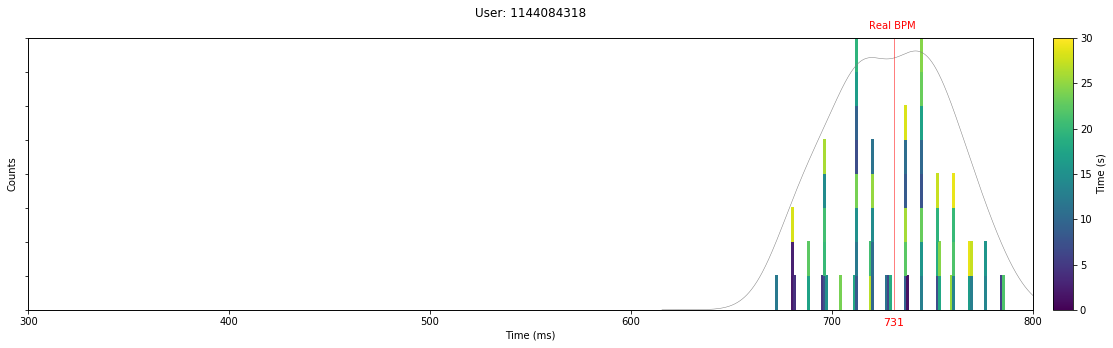

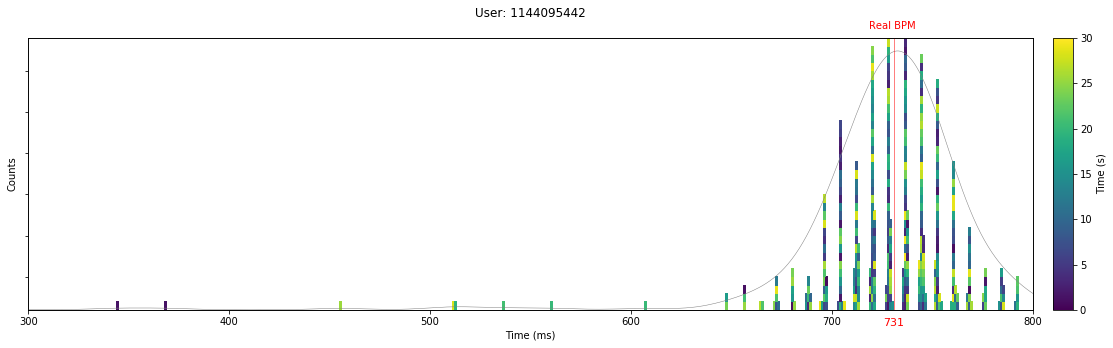

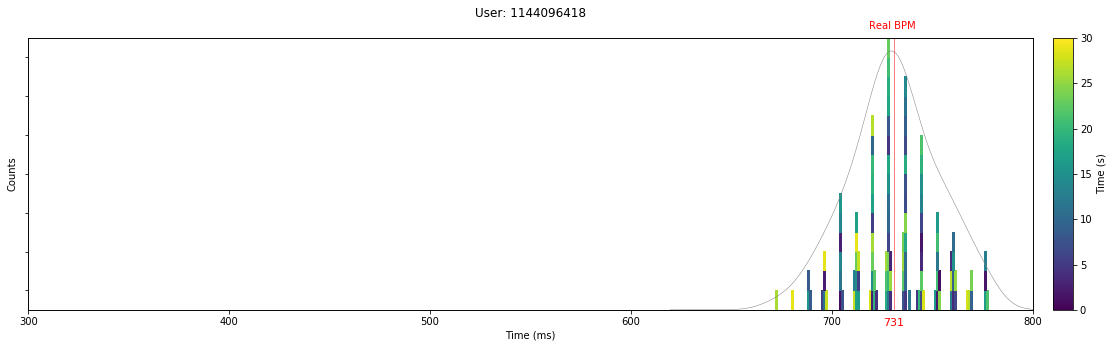

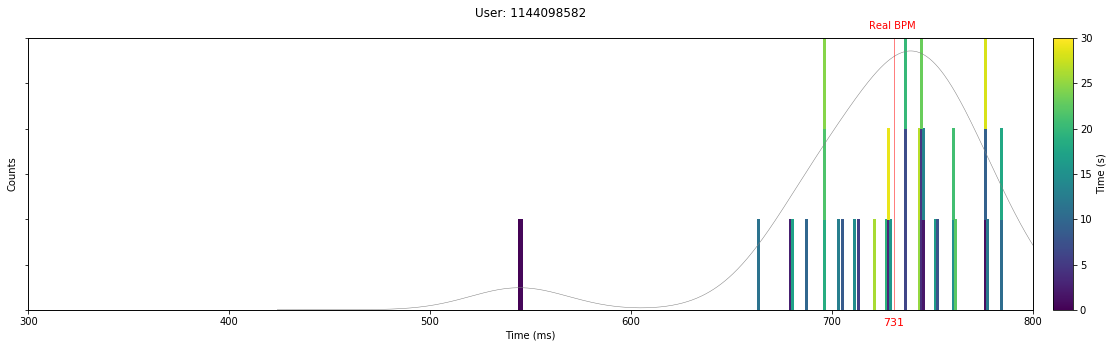

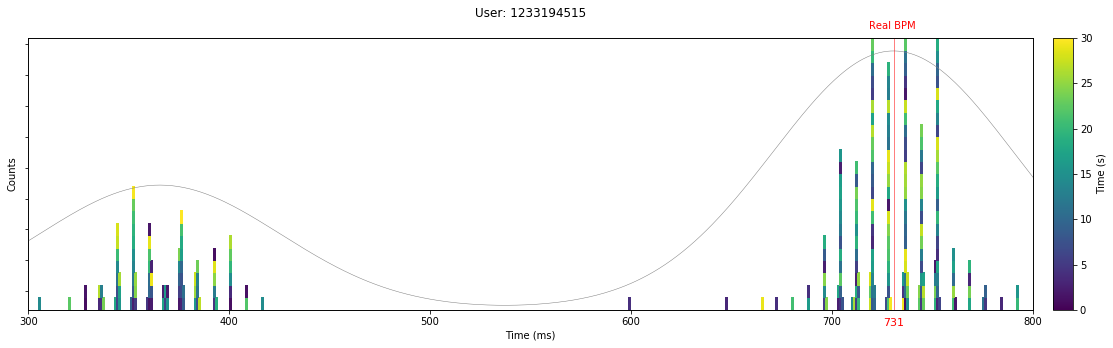

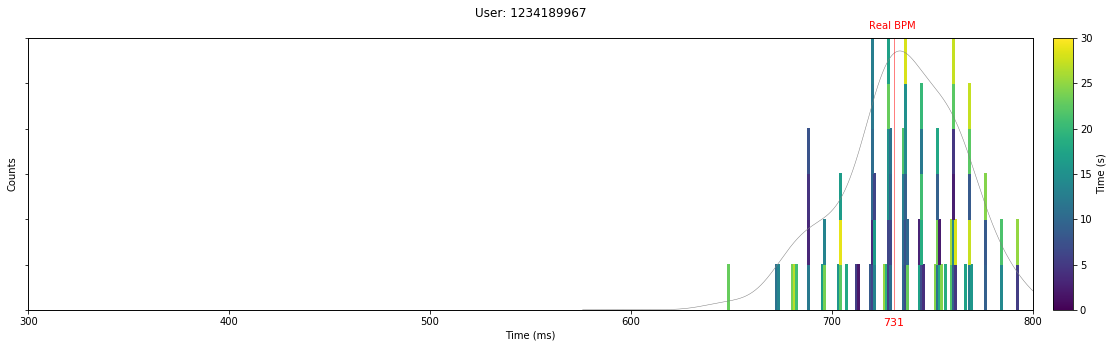

In [36]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
direc = "Data/Global/"
direc_counts = "Data/Global_Counts/"
for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    data_counts = pd.read_csv(os.path.join(direc_counts, file))
    
    #create the kde line
    
    list_counts = []
    for index, row in data_counts.iterrows():

        act_x = row[1]
        while act_x > 0:
            list_counts.append(int(row[0]))
            act_x = act_x - 1

    df = pd.DataFrame(list_counts)

    
    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    #data_cop = data_cop.drop([0],axis=0)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
  




    x = list(data_cop.columns)
    y = list(data_cop.index)
    z = np.asmatrix(data_cop.values)
#    plt.figure(figsize = (18,5))
#    ax = plt.axes()
#    ax.set_yticklabels(y)
#    c = plt.pcolor(x, y, np.array(z), cmap="GnBu", vmin=0, vmax=30)
#    #ax.set_xticklabels(x)
#    df.plot(kind='kde', ax= ax, secondary_y=True , linestyle="--", color = "black")
#    ax.set_yticklabels(y)
#    fig.colorbar(c, ax=ax)




    fig, ax1 = plt.subplots(1,1, figsize = (18,5))

    c = ax1.pcolor(x, y, np.array(z), cmap="viridis", vmin=0, vmax=30)
    ax1.set_yticklabels([])
   
    
    ax2 = ax1.twinx()
    
    #df.plot(kind='kde', ax= ax2, secondary_y=False , linestyle="--", color = "grey", linewidth=0.5)
    df.plot(kind='kde', ax= ax2, secondary_y=False , color = "grey", linewidth=0.5)
    
    
   
    ax1.set_xlim(right=800, left=300)
    
    ax2.set_ylim(bottom=0)
    ax2.get_legend().remove()
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
    
    
    ax2.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=10)
    
    ax2.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=11)
    
    
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Counts')
    
    plt.yticks([])
    plt.ylabel("")
    plt.title("User: "+data_aux[0]+"\n")
    #plt.axvline(x=731,color='red', linewidth=0.5, linestyle= '--')
    plt.axvline(x=731,color='red', linewidth=0.5)
    
    
    axins = inset_axes(ax1,
                   width="2%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.02, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
    
    cb = fig.colorbar(c, ax=ax1, cax = axins)
    cb.set_label('Time (s)')
    plt.show()
    
    

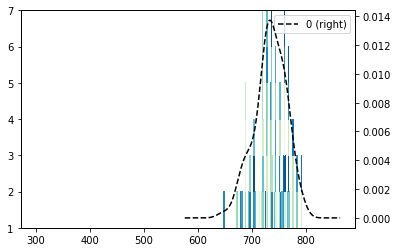

In [13]:
from numpy.random import random

fig, ax1 = plt.subplots(1,1)
c = ax1.pcolor(x, y, np.array(z), cmap="GnBu", vmin=0, vmax=30)

ax2 = ax1.twinx()

df.plot(kind='kde', ax= ax2, secondary_y=True , linestyle="--", color = "black")

#ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()

In [14]:
df

,0
0,648
1,672
2,673
3,680
4,681
5,682
6,688
7,688
8,688
9,688
